Necessary Packages!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#machine learning algorithms, encoding
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
pip install pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_prev= pd.read_csv('previous_application.csv')
df_prev.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP             NaN   
1           -164                    XNA                XAP   Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   

     CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0    Country-wide                35         Connectivity         12.0   
1  Contact center                -1                  XNA         36.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle  POS mobile with interest            365243.0   
1       low_action          Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0

In [4]:
df1_app = pd.read_csv('application_data.csv')


In [5]:
print("Previou_application_size:", df_prev.shape)
print("application_data_size:", df1_app.shape)

Previou_application_size: (1670214, 37)
application_data_size: (307511, 122)


In [ ]:
df_prev['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

Checking Null values in Percentage% wise for previous application

In [6]:
null_values= ((df_prev.isna().sum() / len(df_prev))*100).sort_values(ascending=False)
for column, percentage in null_values.items():
    if percentage > 0:
        print(f'{column}: {percentage:}%')

RATE_INTEREST_PRIVILEGED: 99.6436983524267%
RATE_INTEREST_PRIMARY: 99.6436983524267%
AMT_DOWN_PAYMENT: 53.636480115721696%
RATE_DOWN_PAYMENT: 53.636480115721696%
NAME_TYPE_SUITE: 49.11975351661524%
NFLAG_INSURED_ON_APPROVAL: 40.29812946125467%
DAYS_TERMINATION: 40.29812946125467%
DAYS_LAST_DUE: 40.29812946125467%
DAYS_LAST_DUE_1ST_VERSION: 40.29812946125467%
DAYS_FIRST_DUE: 40.29812946125467%
DAYS_FIRST_DRAWING: 40.29812946125467%
AMT_GOODS_PRICE: 23.08177275486854%
AMT_ANNUITY: 22.286665062081866%
CNT_PAYMENT: 22.286365699245724%
PRODUCT_COMBINATION: 0.02071590826085759%
AMT_CREDIT: 5.9872567227912114e-05%


Removing columns more than 50% of Null values, as if we impute the Null values, it may change the data.. Hence dropping the columns!!

In [7]:
new_col_null_50 = []
for column, percentage in null_values.items():
    if percentage > 50:
        new_col_null_50.append(column)
df_prev.drop(new_col_null_50, axis=1, inplace=True)

Checking after removing the null values:

In [8]:
null_values= ((df_prev.isna().sum() / len(df_prev))*100).sort_values(ascending=False)
for column, percentage in null_values.items():
    if percentage > 0:
        print(f'{column}: {percentage:}%')

NAME_TYPE_SUITE: 49.11975351661524%
DAYS_FIRST_DRAWING: 40.29812946125467%
DAYS_TERMINATION: 40.29812946125467%
DAYS_LAST_DUE: 40.29812946125467%
DAYS_LAST_DUE_1ST_VERSION: 40.29812946125467%
DAYS_FIRST_DUE: 40.29812946125467%
NFLAG_INSURED_ON_APPROVAL: 40.29812946125467%
AMT_GOODS_PRICE: 23.08177275486854%
AMT_ANNUITY: 22.286665062081866%
CNT_PAYMENT: 22.286365699245724%
PRODUCT_COMBINATION: 0.02071590826085759%
AMT_CREDIT: 5.9872567227912114e-05%


Null values Imputation by using Mode and median!!!

In [9]:
for column in df_prev.columns:
    if df_prev[column].dtypes == 'object':
        df_prev[column] = df_prev[column].fillna(df_prev[column].mode()[0])
    else:
        df_prev[column]= df_prev[column].fillna(df_prev[column].median())

In [10]:
print("Previou_application_size:", df_prev.shape)


Previou_application_size: (1670214, 33)


Application data !!

In [632]:
df1_app.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   

   LANDAREA_MODE  

In [697]:
same_col = list(set(df_prev.columns).intersection(df1_app.columns))

In [698]:
same_col

['SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'AMT_ANNUITY',
 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE']

Checking Null values which more than 35% for Application data

In [11]:
app_null = (df1_app.isna().mean()*100).round(2)
sorted_columns = app_null.sort_values(ascending=False)
col_35 = []
for column, percentage in app_null.items():
    if percentage > 35:
        col_35.append(column)
        print(f'{column} {percentage:}%')

OWN_CAR_AGE 65.99%
EXT_SOURCE_1 56.38%
APARTMENTS_AVG 50.75%
BASEMENTAREA_AVG 58.52%
YEARS_BEGINEXPLUATATION_AVG 48.78%
YEARS_BUILD_AVG 66.5%
COMMONAREA_AVG 69.87%
ELEVATORS_AVG 53.3%
ENTRANCES_AVG 50.35%
FLOORSMAX_AVG 49.76%
FLOORSMIN_AVG 67.85%
LANDAREA_AVG 59.38%
LIVINGAPARTMENTS_AVG 68.35%
LIVINGAREA_AVG 50.19%
NONLIVINGAPARTMENTS_AVG 69.43%
NONLIVINGAREA_AVG 55.18%
APARTMENTS_MODE 50.75%
BASEMENTAREA_MODE 58.52%
YEARS_BEGINEXPLUATATION_MODE 48.78%
YEARS_BUILD_MODE 66.5%
COMMONAREA_MODE 69.87%
ELEVATORS_MODE 53.3%
ENTRANCES_MODE 50.35%
FLOORSMAX_MODE 49.76%
FLOORSMIN_MODE 67.85%
LANDAREA_MODE 59.38%
LIVINGAPARTMENTS_MODE 68.35%
LIVINGAREA_MODE 50.19%
NONLIVINGAPARTMENTS_MODE 69.43%
NONLIVINGAREA_MODE 55.18%
APARTMENTS_MEDI 50.75%
BASEMENTAREA_MEDI 58.52%
YEARS_BEGINEXPLUATATION_MEDI 48.78%
YEARS_BUILD_MEDI 66.5%
COMMONAREA_MEDI 69.87%
ELEVATORS_MEDI 53.3%
ENTRANCES_MEDI 50.35%
FLOORSMAX_MEDI 49.76%
FLOORSMIN_MEDI 67.85%
LANDAREA_MEDI 59.38%
LIVINGAPARTMENTS_MEDI 68.35%
LIVINGAREA_M

Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. But practically we get variables with ~50% of missing values but still, the customer insists to have it for analyzing. In those cases, we have to treat them accordingly. Here, we will remove columns with null values of more than 35% after observing those columns.

Let’s check how many columns are there with null values greater than 35%. And remove those.

In [12]:
len(col_35)

49

Removing the columns more than 35% of Null values

In [13]:
df1_app.drop(col_35, axis=1, inplace=True)

After removing the Null values, checking the Null columns again to treat the Null values

In [14]:
new_col_null = []
for column, null_count in (df1_app.isnull().sum()).sort_values(ascending=False).items():
    if null_count > 0:
        percentage = (null_count / len(df1_app))*100
        new_col_null.append(column)
        print(f'{column} {percentage: .2f}%')

OCCUPATION_TYPE  31.35%
EXT_SOURCE_3  19.83%
AMT_REQ_CREDIT_BUREAU_YEAR  13.50%
AMT_REQ_CREDIT_BUREAU_QRT  13.50%
AMT_REQ_CREDIT_BUREAU_MON  13.50%
AMT_REQ_CREDIT_BUREAU_WEEK  13.50%
AMT_REQ_CREDIT_BUREAU_DAY  13.50%
AMT_REQ_CREDIT_BUREAU_HOUR  13.50%
NAME_TYPE_SUITE  0.42%
OBS_30_CNT_SOCIAL_CIRCLE  0.33%
DEF_30_CNT_SOCIAL_CIRCLE  0.33%
OBS_60_CNT_SOCIAL_CIRCLE  0.33%
DEF_60_CNT_SOCIAL_CIRCLE  0.33%
EXT_SOURCE_2  0.21%
AMT_GOODS_PRICE  0.09%
AMT_ANNUITY  0.00%
CNT_FAM_MEMBERS  0.00%
DAYS_LAST_PHONE_CHANGE  0.00%


In [15]:
new_col_null = []
for column, null_count in (df_prev.isnull().sum()).sort_values(ascending=False).items():
    if null_count > 0:
        percentage = (null_count / len(df_prev))*100
        new_col_null.append(column)
        print(f'{column} {percentage: .2f}%')

In [18]:
for column in new_col_null:
    if df1_app[column].dtype == 'object':
        df1_app[column] = df1_app[column].fillna(df1_app[column].mode()[0])
    else:
        df1_app[column] = df1_app[column].fillna(df1_app[column].median())


In [707]:
df_prev.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP   Unaccompanied   
1           -164                    XNA                XAP   Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   

     CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0    Country-wide                35         Connectivity         12.0   
1  Contact center                -1                  XNA         36.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle  POS mobile with interest            365243.0   
1       low_action          Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0

In [708]:
df1_app.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                 -1134.0                0   
1                       0.0                  -828.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0            

In [19]:
print("Shape of application_data_size after removing Null columns:", df1_app.shape)
print("Shape of previous_application_size after removing Null columns:", df_prev.shape)

Shape of application_data_size after removing Null columns: (307511, 73)
Shape of previous_application_size after removing Null columns: (1670214, 33)


Merging the two dataset into one for further examination and analysis!!

In [20]:
df = pd.merge(df_prev, df1_app, on='SK_ID_CURR', how='inner')


In [21]:
df.shape

(1413701, 105)

Checking Null values after merging!!

In [24]:
for column, percentage in (df.isnull().sum()/len(df)*100).sort_values(ascending=False).items():
    if percentage > 0:
        print(f'{column}: {percentage: .2f}%')

In [23]:
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column]= df[column].fillna(df[column].median())

In [173]:
df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   
2     2154916      271877       Consumer loans      12417.390   
3     2802425      108129           Cash loans      25188.615   
4     1536272      108129           Cash loans      21709.125   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   
2         108400.5      119848.5           108400.5   
3         607500.0      679671.0           607500.0   
4         450000.0      512370.0           450000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   
2                       SUNDAY                         14   
3                     THURSDAY                         11   
4                    WEDNESDAY                          9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   
2                           Y                       1                    XAP   
3                           Y                       1                    XNA   
4                           Y                       1                    XNA   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1              Refused           -472  Cash through the bank   
2             Approved           -548  Cash through the bank   
3             Approved           -164                    XNA   
4             Approved           -515                    XNA   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   
2                XAP     Unaccompanied              New   
3                XAP     Unaccompanied         Repeater   
4                XAP     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   
2                 Furniture            POS               XNA   
3                       XNA           Cash            x-sell   
4                       XNA           Cash            x-sell   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   
3    Contact center                -1                  XNA         36.0   
4   AP+ (Cash loan)                 6                  XNA         36.0   

  NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle    POS mobile with interest            365243.0   
1       low_normal  POS industry with interest            365243.0   
2           middle  POS industry with interest            365243.0   
3       low_action            Cash X-Sell: low            365243.0   
4       low_normal            Cash X-Sell: low            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -831.0                     -361.0         -537.0            -499.0   
2          -512.0                     -182.0         -392.0            -387.0   
3          -134.0                      916.0       365243.0          365243.0   
4          -485.0              

In [175]:
df[df.duplicated()]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE_x, AMT_ANNUITY_x, AMT_APPLICATION, AMT_CREDIT_x, AMT_GOODS_PRICE_x, WEEKDAY_APPR_PROCESS_START_x, HOUR_APPR_PROCESS_START_x, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE_x, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL, TARGET, NAME_CONTRACT_TYPE_y, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT_y, AMT_ANNUITY_y, AMT_GOODS_PRICE_y, NAME_TYPE_SUITE_y, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START_y, HOUR_APPR_PROCESS_START_y, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, ...]
Index: []

In [178]:
for i in (df.columns.tolist()):
    print(i)

SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE_x
AMT_ANNUITY_x
AMT_APPLICATION
AMT_CREDIT_x
AMT_GOODS_PRICE_x
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE_x
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
TARGET
NAME_CONTRACT_TYPE_y
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_y
AMT_ANNUITY_y
AMT_GOODS_PRICE_y
NAME_TYPE_SUITE_y
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHON

In [ ]:
df['WEEKDAY_APPR_PROCESS_START_x'].value_counts()

In [25]:

df.drop(['WEEKDAY_APPR_PROCESS_START_y'], axis=1, inplace=True)

In [26]:
df['NAME_TYPE_SUITE_x'].value_counts()

NAME_TYPE_SUITE_x
Unaccompanied      1122307
Family              181880
Spouse, partner      57586
Children             27106
Other_B              15073
Other_A               7820
Group of people       1929
Name: count, dtype: int64

In [195]:
df['NAME_TYPE_SUITE_y'].value_counts()

NAME_TYPE_SUITE_y
Unaccompanied      1157904
Family              184261
Spouse, partner      46652
Children             13906
Other_B               6735
Other_A               3020
Group of people       1223
Name: count, dtype: int64

In [27]:
df.drop(['NAME_TYPE_SUITE_y'], axis=1, inplace=True)

In [28]:
df.drop(['AMT_ANNUITY_y'], axis=1, inplace=True)

In [29]:
df.drop(['HOUR_APPR_PROCESS_START_y', 'NAME_CONTRACT_TYPE_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y'], axis=1, inplace=True)

In [650]:
print(same_col)# as we have x and y columns for same name dropping the y columns

['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'AMT_ANNUITY', 'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_GOODS_PRICE']


In [719]:
print(df.shape)

(1413701, 98)


In [241]:
df.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   
2     2154916      271877       Consumer loans      12417.390   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   
2         108400.5      119848.5           108400.5   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   
2                       SUNDAY                         14   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   
2                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   
2             Approved            548  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   
2                XAP     Unaccompanied              New   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   
2                 Furniture            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   
2           middle            365243.0           512.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   
2                      182.0          392.0             387.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   
2                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   
2             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment       14443           7392   
1            Married  House / apartment       14443           7392   
2            Married  House / apartment       14443           7392   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             8447.0             4120           1               1   
1             8447.0             4120           1               1   
2             8447.0             4120           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0        L

Some columns starts with Days, look into those columns

In [720]:
day_cols = [i for i in df if i.startswith('DAYS')]
day_cols

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

As all these columns have negative values, lets change to postive ones.

In [721]:
for i in day_cols:
    df[i] = abs(df[i])

In [30]:
unwanted = ['PRODUCT_COMBINATION', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_LIVE_REGION',
            'LIVE_REGION_NOT_WORK_REGION', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',"FLAG_DOCUMENT_3",'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
            'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
df.drop(unwanted, axis=1, inplace=True)

In [31]:
print('Size of dataframe after dropping unwanted columns:', df.shape)

Size of dataframe after dropping unwanted columns: (1413701, 72)


In [724]:
df.dtypes

SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE_x             object
AMT_ANNUITY_x                   float64
AMT_APPLICATION                 float64
AMT_CREDIT_x                    float64
AMT_GOODS_PRICE_x               float64
WEEKDAY_APPR_PROCESS_START_x     object
HOUR_APPR_PROCESS_START_x         int64
FLAG_LAST_APPL_PER_CONTRACT      object
NFLAG_LAST_APPL_IN_DAY            int64
NAME_CASH_LOAN_PURPOSE           object
NAME_CONTRACT_STATUS             object
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE                object
CODE_REJECT_REASON               object
NAME_TYPE_SUITE_x                object
NAME_CLIENT_TYPE                 object
NAME_GOODS_CATEGORY              object
NAME_PORTFOLIO                   object
NAME_PRODUCT_TYPE                object
CHANNEL_TYPE                     object
SELLERPLACE_AREA                  int64
NAME_SELLER_INDUSTRY             object
CNT_PAYMENT                     float64


In [263]:
df['NAME_PRODUCT_TYPE'].value_counts()

NAME_PRODUCT_TYPE
XNA        900053
x-sell     385394
walk-in    128254
Name: count, dtype: int64

Let's Start the EDA process.

creating the users age using Days Birth information from data!!

In [32]:
df['age_in_years'] = (df['DAYS_BIRTH']/365)

In [94]:
df.isnull().any().value_counts()

False    52
Name: count, dtype: int64

In [33]:
df.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [662]:
(df['age_in_years'].head(5)).round(2)

0    39.57
1    39.57
2    39.57
3    58.45
4    58.45
Name: age_in_years, dtype: float64

In [727]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'AMT_ANNUITY_x',
       'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_x',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'DAYS_REGI

In [264]:
df.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0            Married  House / apartment       14443           7392   
1            Married  House / apartment       14443           7392   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             8447.0             4120           1               1   
1             8447.0             4120           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0        Laborers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION  \
0              3.0                     1                           1   
1              3.0                     1                           1   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   

  ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0          Military      0.683797                       3.0   
1          Military      0.683797                       3.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       0.0                       3.0   
1                       0.0                       3.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                   548.0   
1   

Let's start with the Target profiles based on previous application!!

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

In [728]:
df['TARGET'].value_counts()

TARGET
0    1291341
1     122360
Name: count, dtype: int64

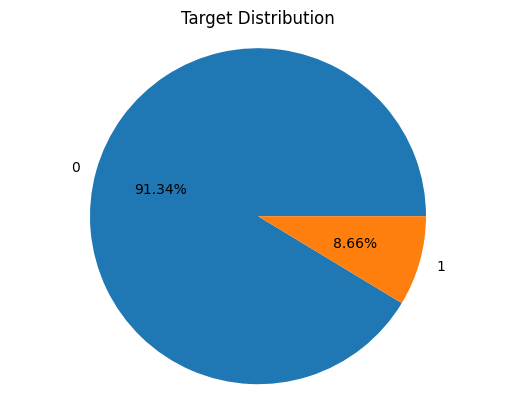

In [278]:
plt.pie(df['TARGET'].value_counts(), labels=['0', '1'], autopct='%1.2f%%')
plt.title('Target Distribution')
plt.axis('equal')
plt.show()

Insights: Target columns had 1 & 0. In which 1 means client with payment difficulties. Only 8.66% were facing difficulites in repaying the loan.

Lets separately analyse the data based on the target variable for a better understanding.

In [285]:
df[df['TARGET']==1]['CODE_GENDER'].value_counts().reset_index()

CODE_GENDER  count
0           F  72836
1           M  49524

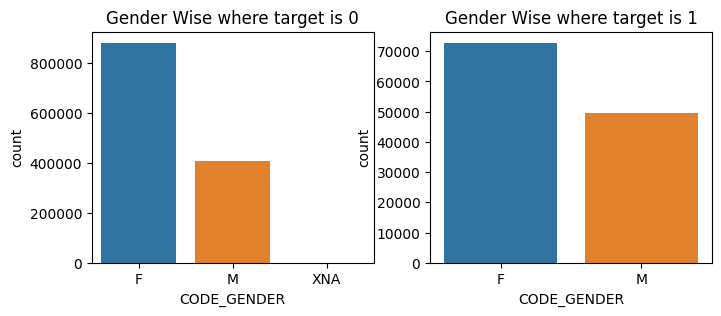

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
sns.barplot(x='CODE_GENDER', y = 'count', hue= 'CODE_GENDER', data=df[df['TARGET'] == 0]['CODE_GENDER'].value_counts().reset_index(), ax=axes[0])
axes[0].set_title('Gender Wise where target is 0')
sns.barplot(x='CODE_GENDER', y = 'count',hue= 'CODE_GENDER', data=df[df['TARGET'] == 1]['CODE_GENDER'].value_counts().reset_index(), ax=axes[1])
axes[1].set_title('Gender Wise where target is 1')
plt.show()

Insights: 

Where Target == 0: 
Females contributed good in paying loans nearly above 80000
Males contributed less while comparing to Females in both Target 0 & 1.

In [ ]:
df.groupby('TARGET')['age_in_years'].value_counts()

In [663]:
df['AGE_GROUP']=pd.cut(df['age_in_years'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning


In [664]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
Middle_Age        872321
Young             317216
Senior_Citizen    184346
Very_Young         39818
Name: count, dtype: int64

In [327]:
df[df['TARGET'] == 1]['AGE_GROUP'].value_counts().reset_index()

AGE_GROUP  count
0      Middle_Age  72212
1           Young  35671
2  Senior_Citizen   9504
3      Very_Young   4973

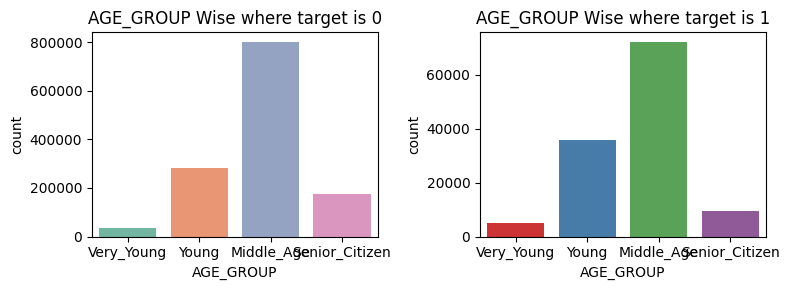

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Plot for TARGET == 0
sns.barplot(x='AGE_GROUP', y='count', hue='AGE_GROUP', data=df[df['TARGET'] == 0]['AGE_GROUP'].value_counts().reset_index(), ax=axes[0], palette='Set2')
axes[0].set_title('AGE_GROUP Wise where target is 0')

# Plot for TARGET == 1
sns.barplot(x='AGE_GROUP', y='count', hue='AGE_GROUP', data=df[df['TARGET'] == 1]['AGE_GROUP'].value_counts().reset_index(), ax=axes[1], palette='Set1')
axes[1].set_title('AGE_GROUP Wise where target is 1')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Insights:


Middle age groups at 35 to 40 age groups persons applying loans in high numbers and followed by Young people.


Target 1 >>> Middle and Young were facing some difficulties in repaying the due.

Organization’s  Distribution Based on Target 0 and Target 1

In [345]:
df[df['TARGET']==1].groupby('ORGANIZATION_TYPE')['TARGET'].value_counts().sort_values(ascending = False).head(16).reset_index()

ORGANIZATION_TYPE  TARGET  count
0   Business Entity Type 3       1  30367
1            Self-employed       1  19214
2                      XNA       1  16025
3                    Other       1   6138
4   Business Entity Type 2       1   4307
5                 Medicine       1   3973
6            Trade: type 7       1   3795
7             Construction       1   3740
8               Government       1   3419
9                   School       1   2623
10       Transport: type 4       1   2435
11  Business Entity Type 1       1   2381
12            Kindergarten       1   2201
13        Industry: type 3       1   1745
14                Security       1   1658
15           Trade: type 3       1   1598

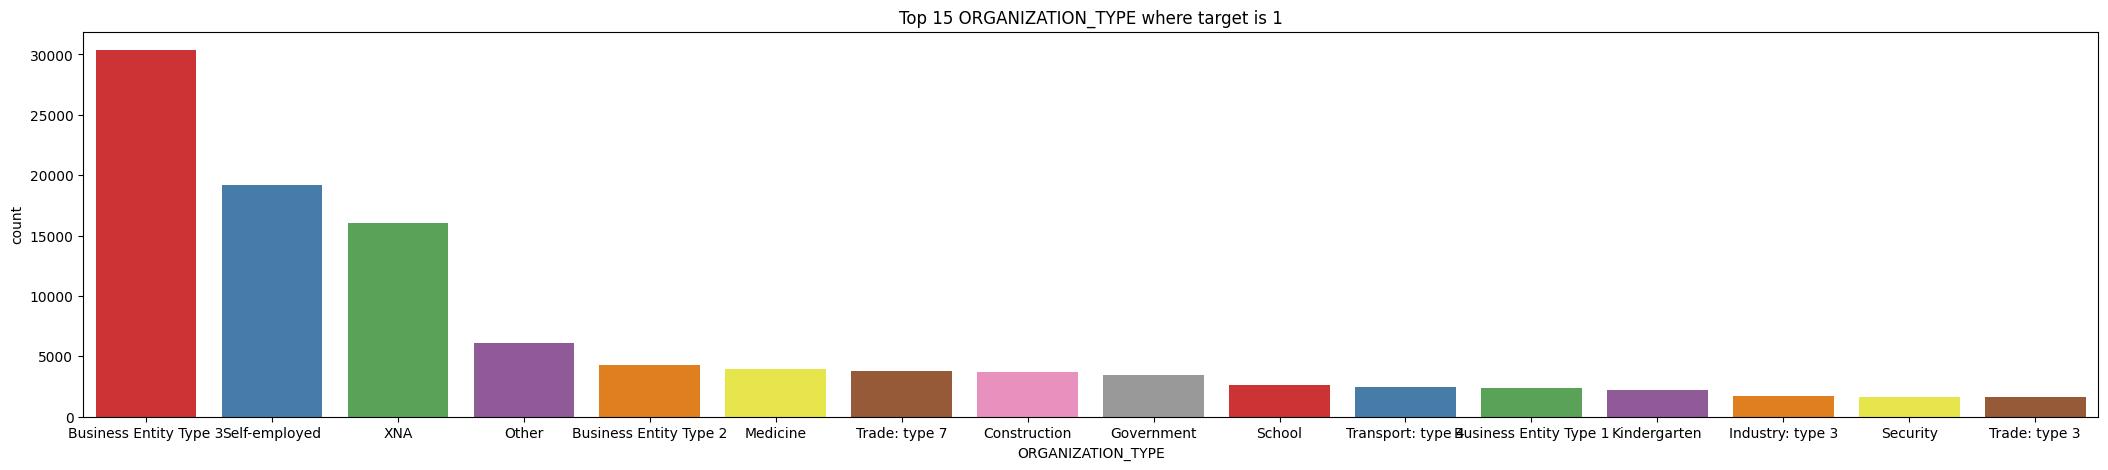

In [354]:
plt.figure(figsize=(26,5))
sns.barplot(x= 'ORGANIZATION_TYPE', y = 'count', hue= 'ORGANIZATION_TYPE', data=df[df['TARGET'] == 1]['ORGANIZATION_TYPE'].value_counts().head(16).reset_index(), palette='Set1')
plt.title('Top 15 ORGANIZATION_TYPE where target is 1')
plt.show()

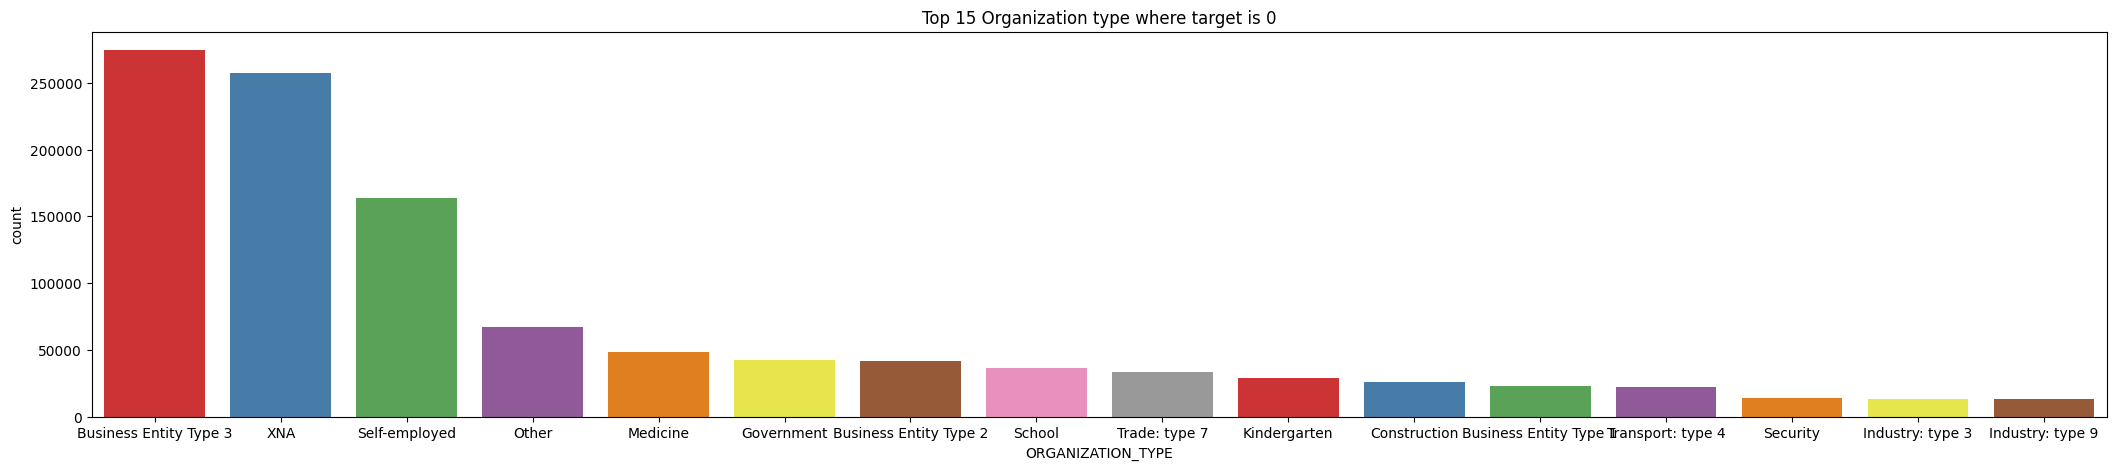

In [355]:
plt.figure(figsize=(26,5))
sns.barplot(x= 'ORGANIZATION_TYPE', y = 'count', hue= 'ORGANIZATION_TYPE', data=df[df['TARGET'] == 0]['ORGANIZATION_TYPE'].value_counts().head(16).reset_index(), palette='Set1')
plt.title("Top 15 Organization type where target is 0")
plt.show()

Insights:

Upon checking, we can found that Business, Self-Employed people were seeking for loans.


In this, 19.45% of Business users paying their loans without any difficulties and 2.12% from Business had trouble in paying their loan dues at ontime.

Likewise, XNA, self-Employed were contributing high numbers in getting loans!!

In [363]:
df[df['TARGET']==1].groupby('NAME_CLIENT_TYPE')['TARGET'].value_counts().sort_values(ascending = False).reset_index()

NAME_CLIENT_TYPE  TARGET  count
0         Repeater       1  90430
1              New       1  23345
2        Refreshed       1   8432
3              XNA       1    153

In [364]:
df[df['TARGET']==0].groupby('NAME_CLIENT_TYPE')['TARGET'].value_counts().sort_values(ascending = False).reset_index()

NAME_CLIENT_TYPE  TARGET   count
0         Repeater       0  947252
1              New       0  236195
2        Refreshed       0  106504
3              XNA       0    1390

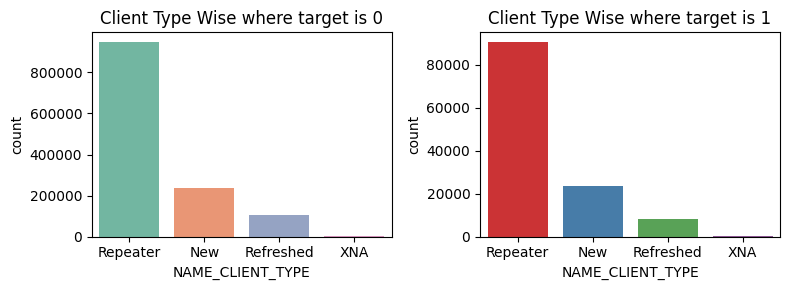

In [365]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Plot for TARGET == 0
sns.barplot(x='NAME_CLIENT_TYPE', y='count', hue='NAME_CLIENT_TYPE', data=df[df['TARGET']==0].groupby('NAME_CLIENT_TYPE')['TARGET'].value_counts().sort_values(ascending = False).reset_index(), ax=axes[0], palette='Set2')
axes[0].set_title('Client Type Wise where target is 0')

# Plot for TARGET == 1
sns.barplot(x='NAME_CLIENT_TYPE', y='count', hue='NAME_CLIENT_TYPE', data=df[df['TARGET']==1].groupby('NAME_CLIENT_TYPE')['TARGET'].value_counts().sort_values(ascending = False).reset_index(), ax=axes[1], palette='Set1')
axes[1].set_title('Client Type Wise where target is 1')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Insights:

Repeated clients in the range of above 8000 had high difficulties in paying the loan due at correct time while comparing to others like New, Refreshed!!

In [366]:
df.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0            Married  House / apartment           7392             8447.0   
1            Married  House / apartment           7392             8447.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             4120           1               1                0   
1             4120           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              3.0   
1                 1           1           0        Laborers              3.0   

   REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                     1                           1                       0   
1                     1                           1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Military   
1                       0                        0          Military   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.683797                       3.0                       0.0   
1      0.683797                       3.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       3.0                       0.0                   548.0   
1                       3.0                       0.0                   548.0   



In [367]:
categorical_col = [i  for i in df.columns if df[i].dtypes == 'object']

In [368]:
categorical_col

['NAME_CONTRACT_TYPE_x',
 'WEEKDAY_APPR_PROCESS_START_x',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_x',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']



Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP', 'NAME_CLIENT_TYPE' because we have already taken up the isights from  above plots

In [383]:
# categorical_col.remove('ORGANIZATION_TYPE')
# categorical_col.remove('NAME_CLIENT_TYPE')
# categorical_col.remove('FLAG_LAST_APPL_PER_CONTRACT')
categorical_col.remove('NAME_CONTRACT_STATUS')
categorical_col.remove('NAME_GOODS_CATEGORY')
categorical_col.remove('NAME_PORTFOLIO')
categorical_col.remove('CODE_GENDER')





In [400]:
def plot_side_by_side_bar(df, categorical_column):
    fig, axes = plt.subplots(1, 2, figsize=(18, 3))

    # Plot for TARGET == 0
    data_0 = df[df['TARGET'] == 0].groupby(categorical_column)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.barplot(x=categorical_column, y='count', hue=categorical_column, data=data_0, ax=axes[0], palette='Set2')
    axes[0].set_title(f'{categorical_column} Wise where target is 0')

    # Plot for TARGET == 1
    data_1 = df[df['TARGET'] == 1].groupby(categorical_column)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.barplot(x=categorical_column, y='count', hue=categorical_column, data=data_1, ax=axes[1], palette='Set1')
    axes[1].set_title(f'{categorical_column} Wise where target is 1')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()




In [ ]:
# plot_side_by_side_bar(df, 'NAME_CLIENT_TYPE')

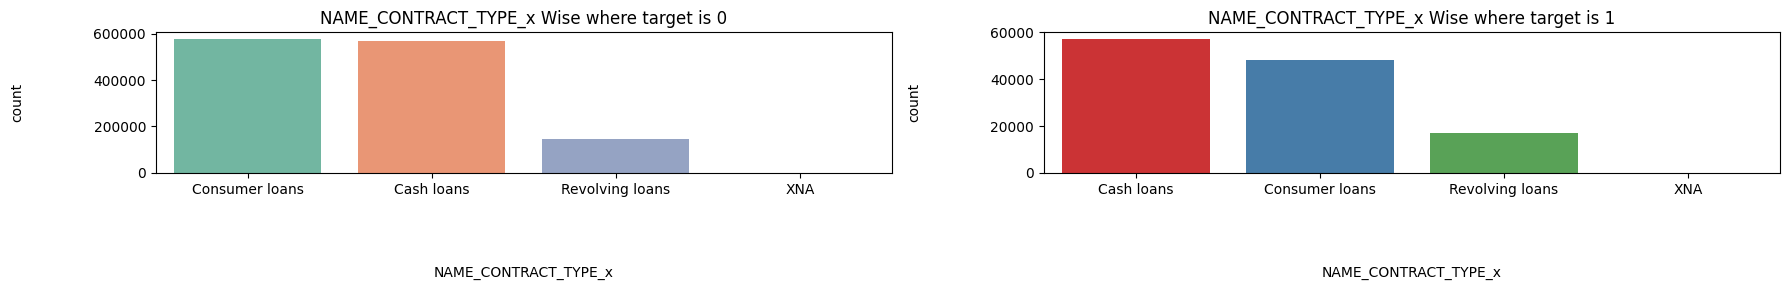

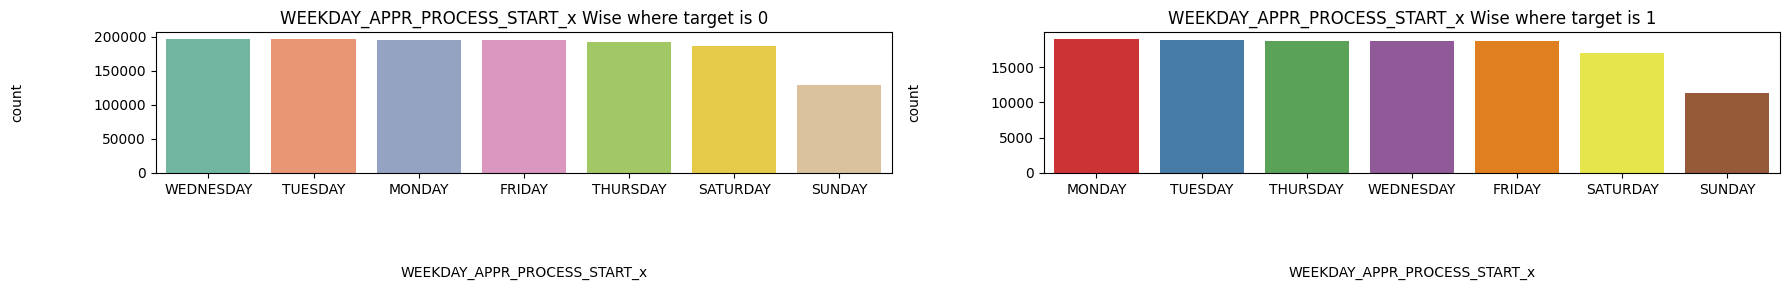

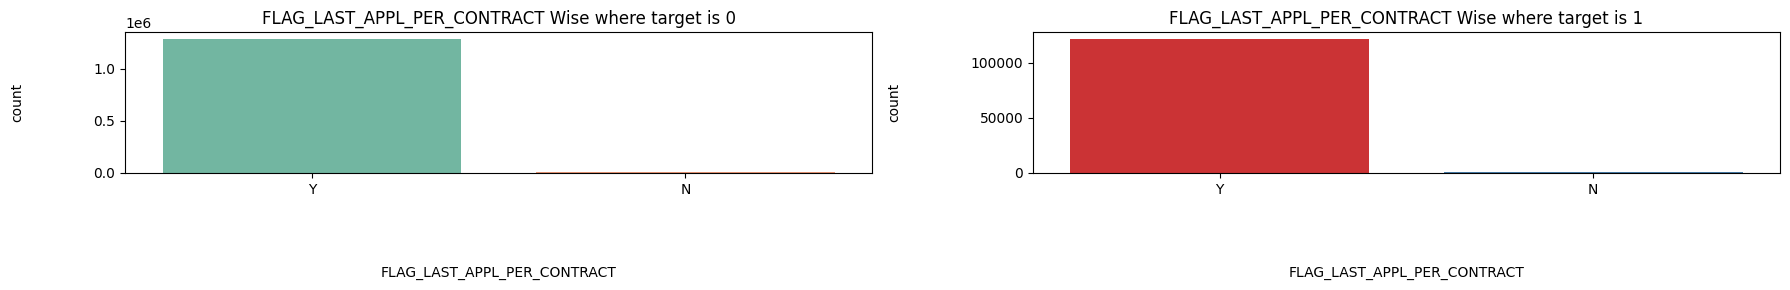

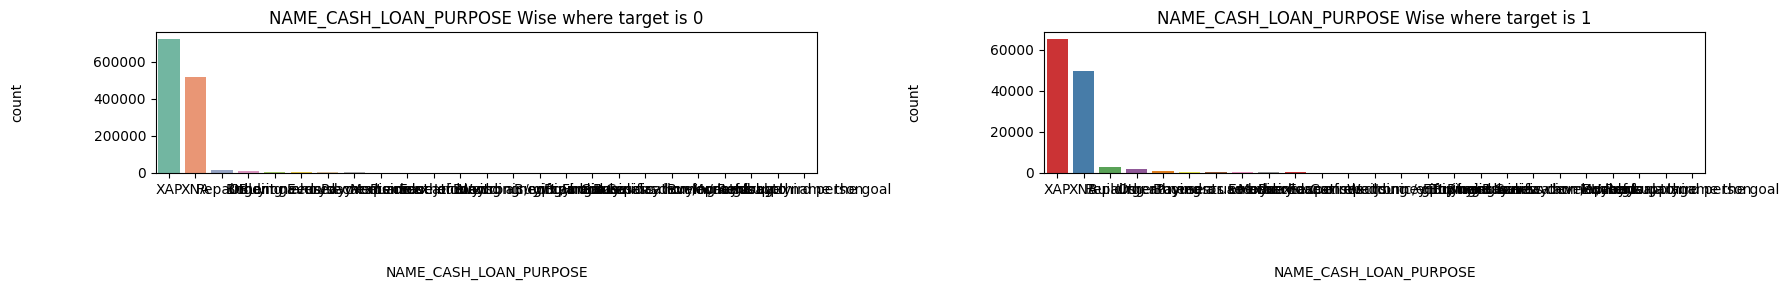

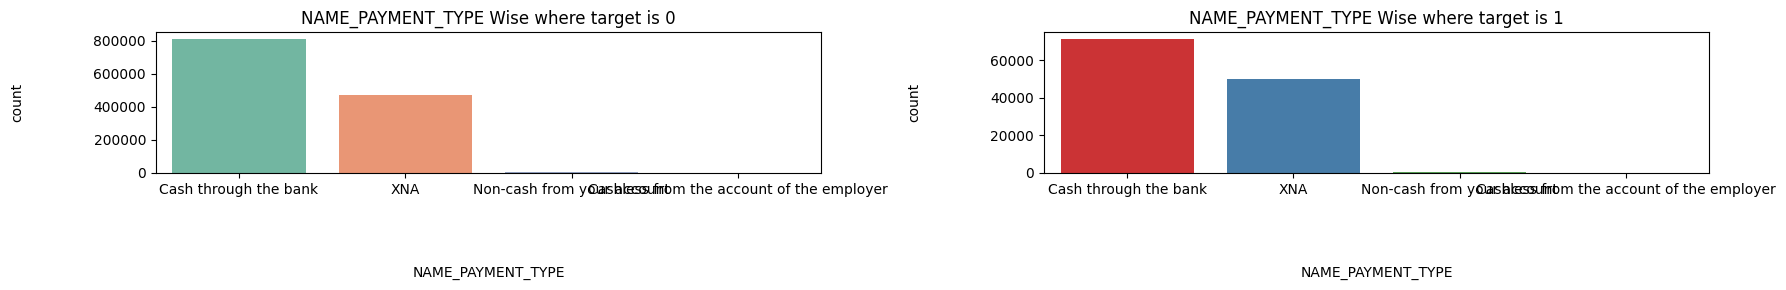

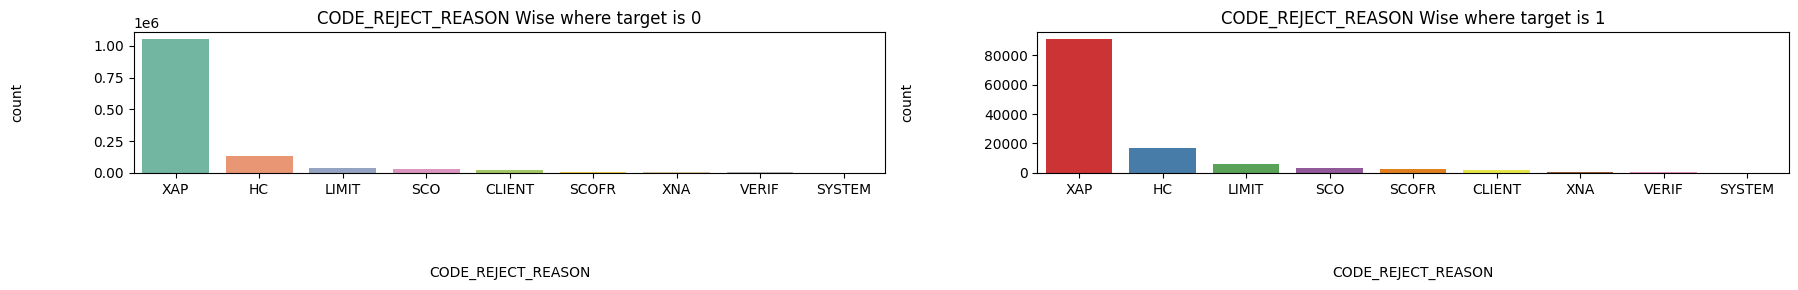

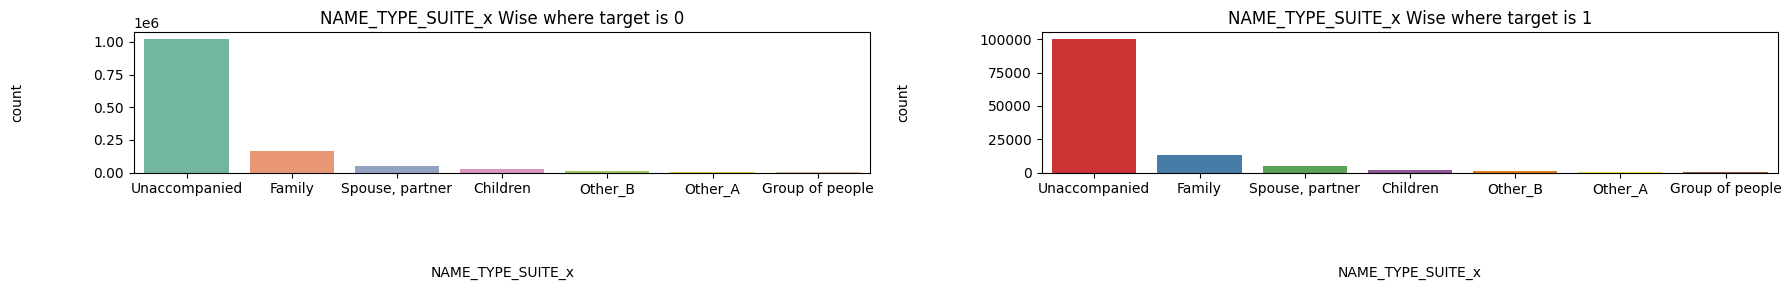

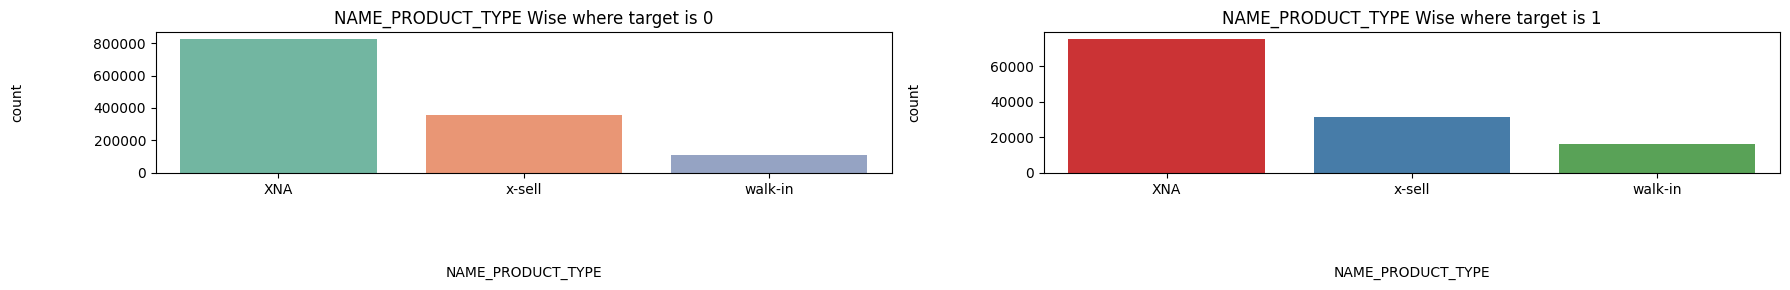

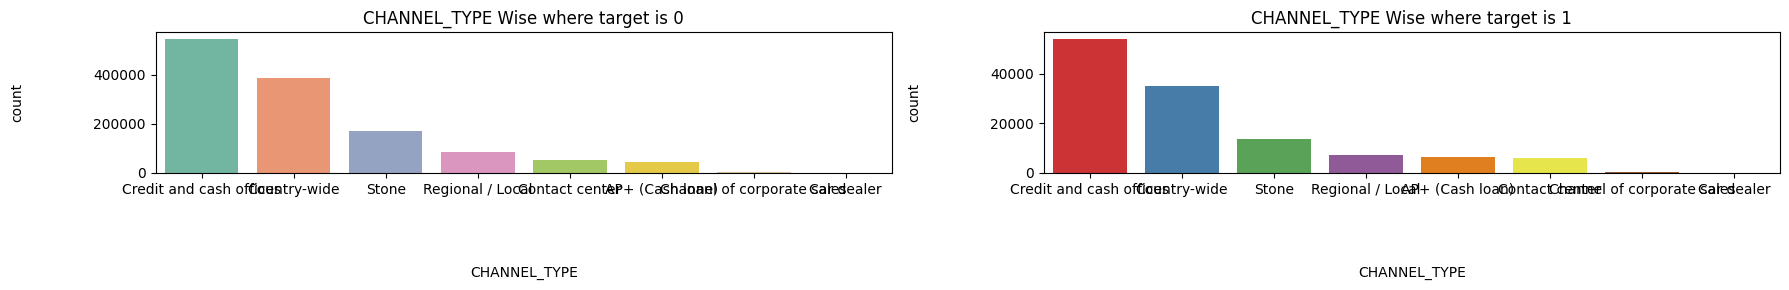

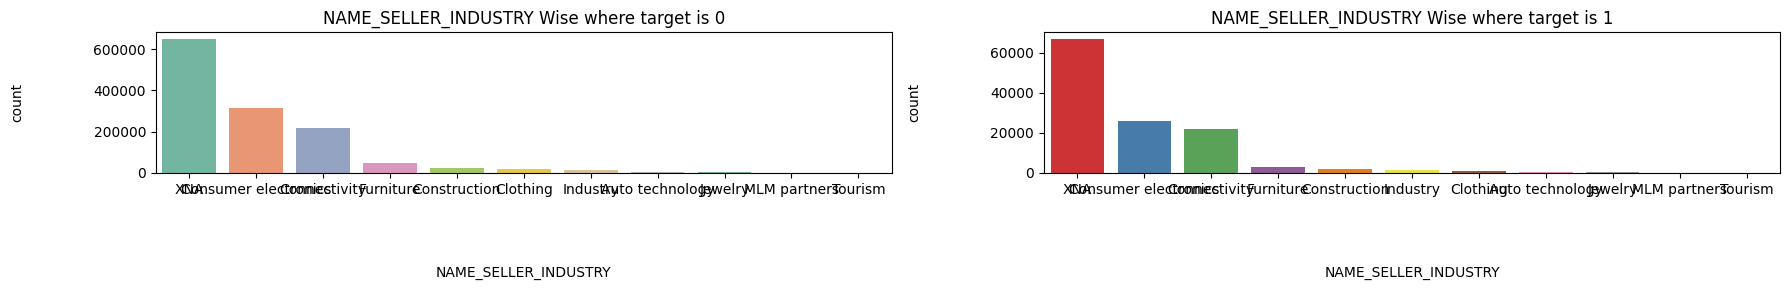

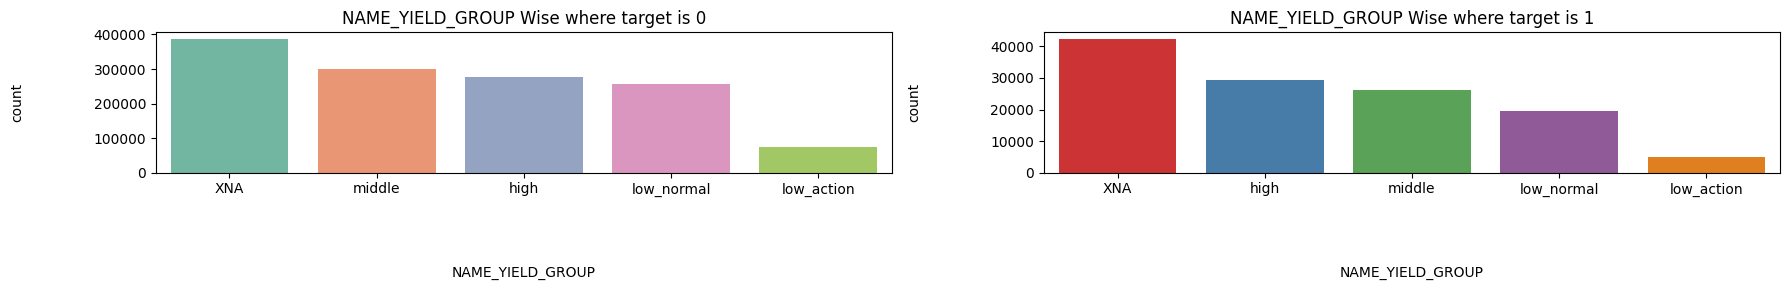

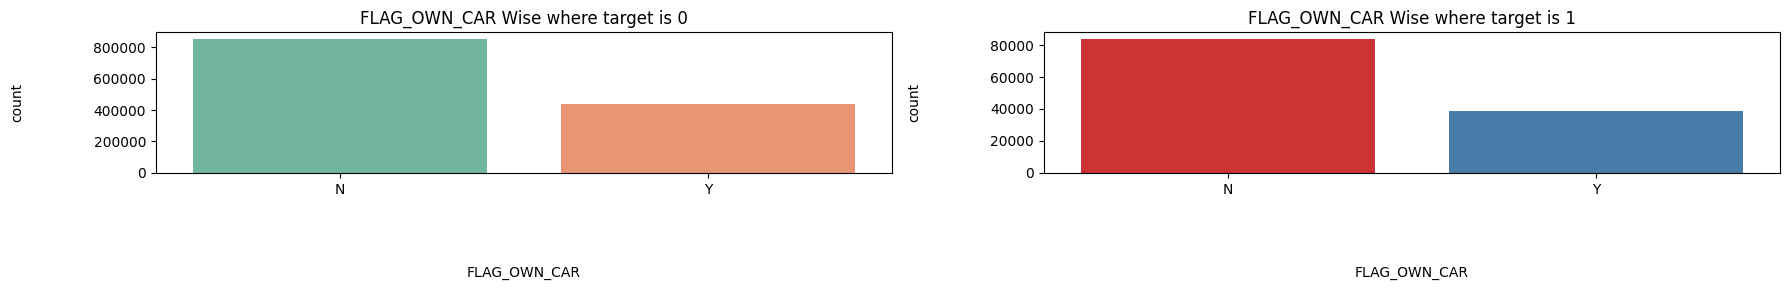

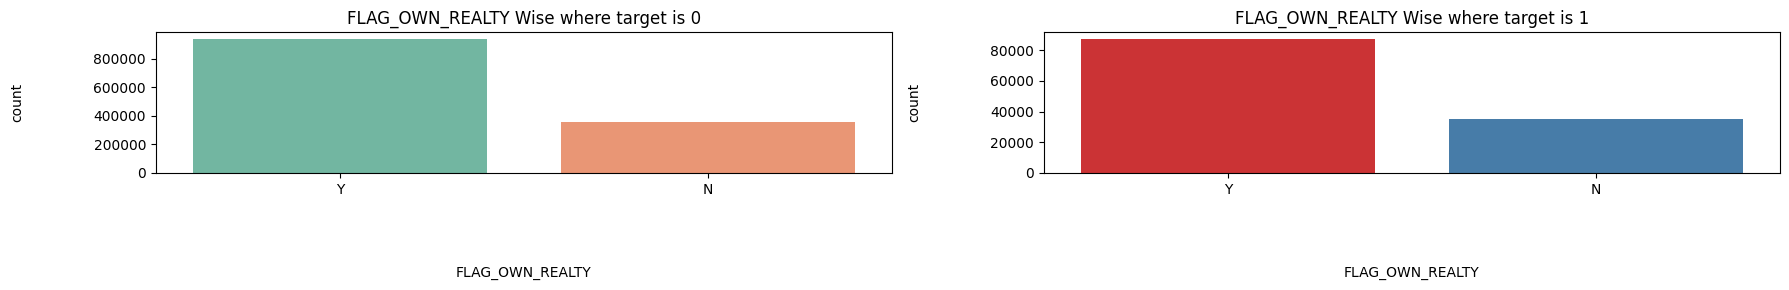

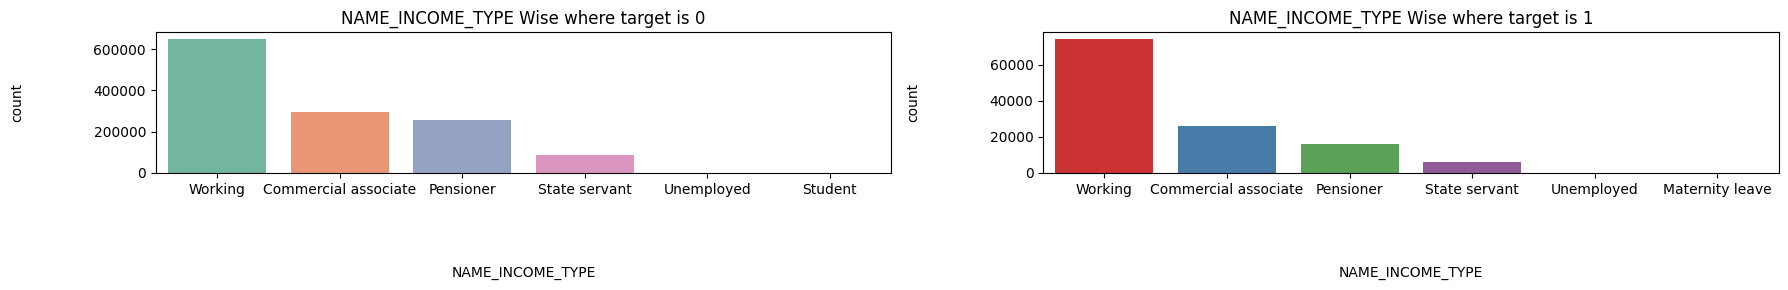

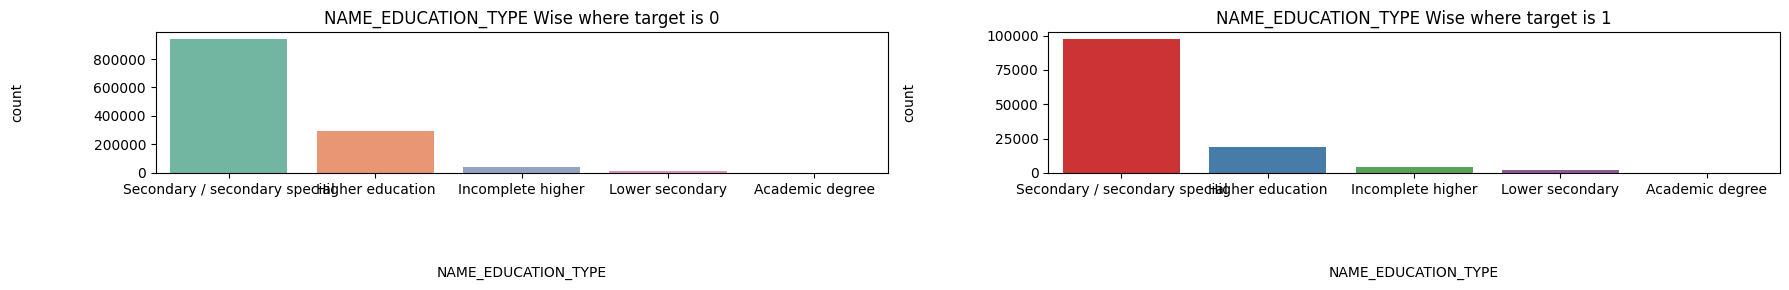

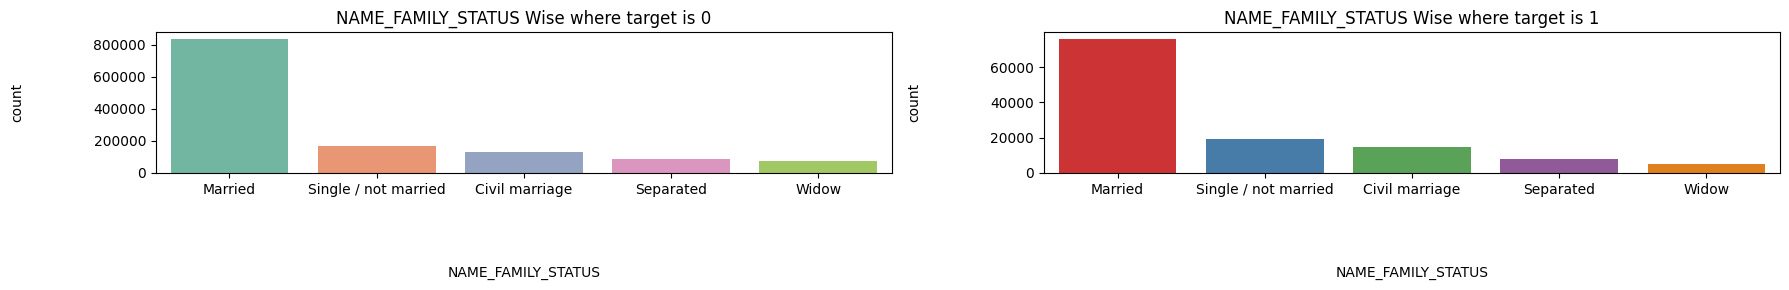

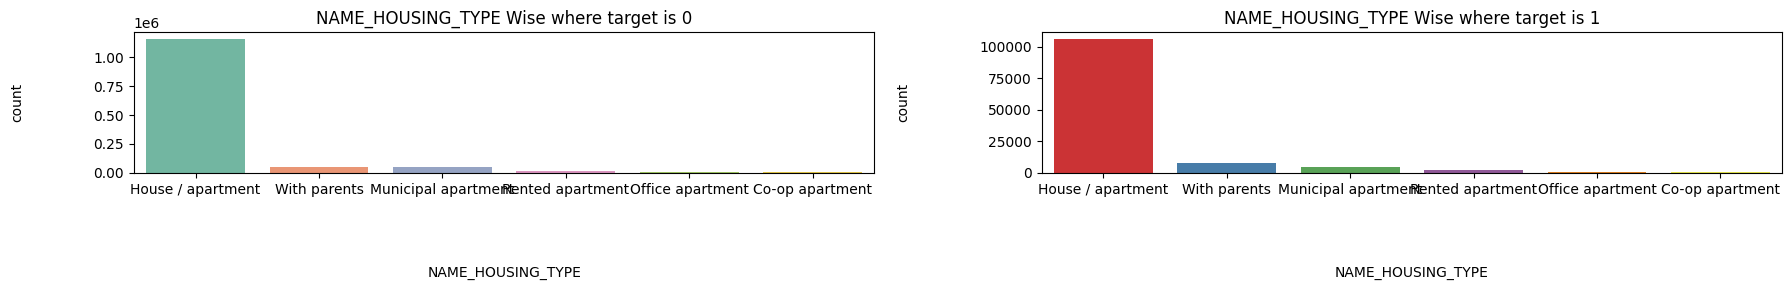

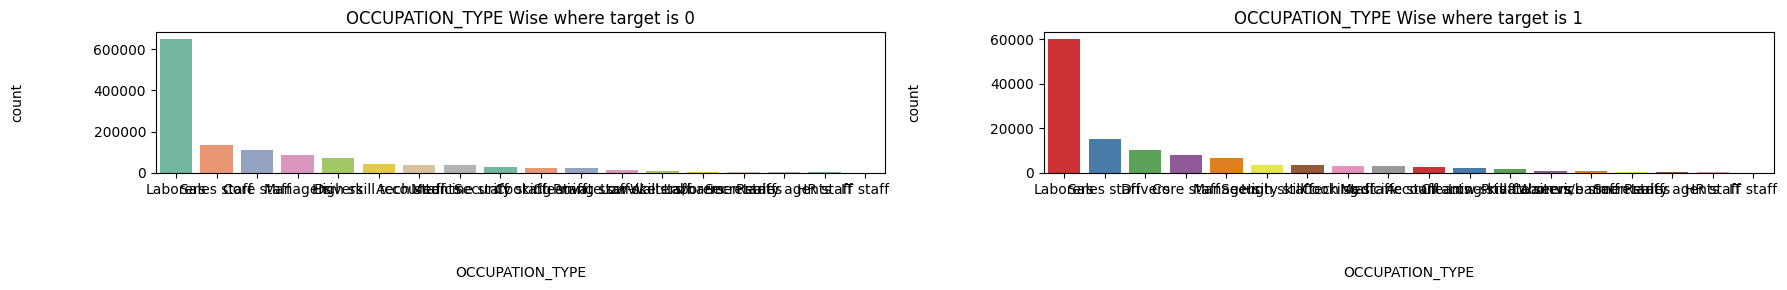

In [399]:
for cat in categorical_col:
    plot_side_by_side_bar(df, cat)
    

Insights:

Contract_Type: In this, Cash loans were not paid ontime on loan dues while comparing to consumer loans and cash loans. 

Payment_type: Cash through bank had high contribution and users prefer for cash through bank. Also, cash through bank had high difficulties in repaying loan

Code-Reject_reason: XAP, HC, limit reason were contributed high in loans, where XAP had huge marging whereas in getting loan and difficulties in paying!

Name_type_suite: Unaccompanied, family, Spouse, children are the major in getting loans and in which Unaccompanied had high marging in difficult in paying loans. 

Name_product_type: XNA, X-sell, walk-in are the major contribution in getting loans and repaying loans.

Channel_Type: Credit and cash, country_wide are the playing huge role in difficult

Flag_own_car - Clients who had No car, seeking for loans while comparing to others and we can see some difficulties in repaying.

Name_income_Type: Clients on working, commercial associate, Pensioner, state servant had asking loans. In this, Working professional had some difficult in repaying the loans while comparing to others. 

General insights:

Married clients, House_types like house / apartment, were high in getting loans and there were some difficult in paying the loans too. 

Analysis with Numerical columns on Target variable!!

In [401]:
continous_col = [i  for i in df.columns if df[i].dtypes != 'object']

In [402]:
continous_col

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY_x',
 'AMT_APPLICATION',
 'AMT_CREDIT_x',
 'AMT_GOODS_PRICE_x',
 'HOUR_APPR_PROCESS_START_x',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT

In [407]:
df[df['TARGET'] == 0]['AMT_ANNUITY_x'].value_counts().head(10)

AMT_ANNUITY_x
11250.0    287932
2250.0      23267
6750.0      10384
9000.0       9554
22500.0      9213
4500.0       8067
13500.0      5265
3375.0       3957
7875.0       3601
5625.0       3161
Name: count, dtype: int64

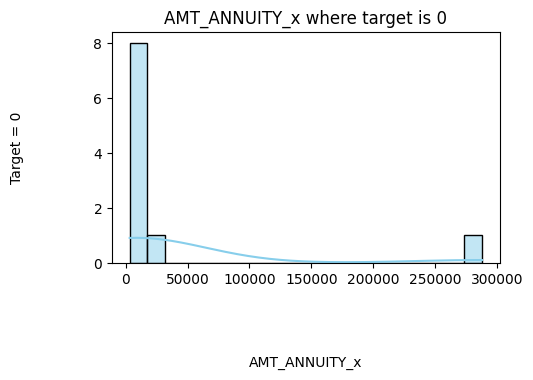

In [413]:
plt.figure(figsize=(5,3))
sns.histplot(df[df['TARGET'] == 0]['AMT_ANNUITY_x'].value_counts().head(10), bins=20, kde=True, color='skyblue')
plt.title('AMT_ANNUITY_x where target is 0')
plt.xlabel('AMT_ANNUITY_x')
plt.ylabel('Target = 0')
plt.show()

In [414]:
def plot_side_by_side_bar(df, continous_col):
    fig, axes = plt.subplots(1, 2, figsize=(5, 3))

    # Plot for TARGET == 0
    data_0 = df[df['TARGET'] == 0].groupby(continous_col)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.histplot(df[df['TARGET'] == 0]['continous_col'].value_counts().head(10), bins=20, kde=True, color='skyblue')
    axes[0].set_title(f'{continous_col} Wise where target is 0')
    axes[0].set_xlabel(continous_col)
    axes[0].set_ylabel('Target = 0')

    # Plot for TARGET == 1
    data_1 = df[df['TARGET'] == 1].groupby(continous_col)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.histplot(df[df['TARGET'] == 1]['continous_col'].value_counts().head(10), bins=20, kde=True, color='skyblue')
    axes[1].set_title(f'{continous_col} Wise where target is 1')
    axes[0].set_xlabel(continous_col)
    axes[0].set_ylabel('Target = 1')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

In [422]:
def plot_side_by_side_bar(df, continuous_col):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Plot for TARGET == 0
    data_0 = df[df['TARGET'] == 0].groupby(continuous_col)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.scatterplot(df[df['TARGET'] == 0][continuous_col].value_counts().head(10), bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'{continuous_col} Wise where target is 0')
    axes[0].set_xlabel(continuous_col)
    axes[0].set_ylabel('Target = 0')

    # Plot for TARGET == 1
    data_1 = df[df['TARGET'] == 1].groupby(continuous_col)['TARGET'].value_counts().sort_values(ascending=False).reset_index()
    sns.scatterplot(df[df['TARGET'] == 1][continuous_col].value_counts().head(10), bins=20, kde=True, color='skyblue', ax=axes[1])
    axes[1].set_title(f'{continuous_col} Wise where target is 1')
    axes[1].set_xlabel(continuous_col)
    axes[1].set_ylabel('Target = 1')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()




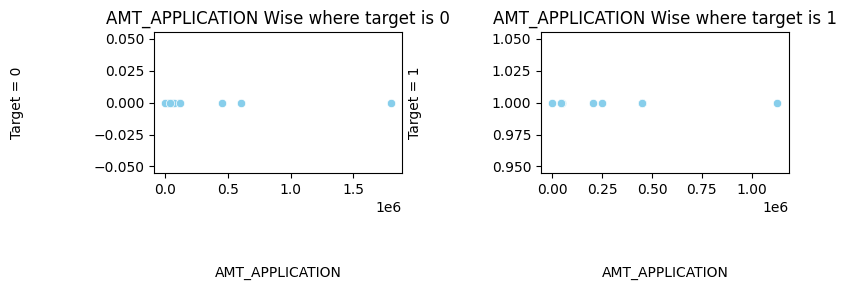

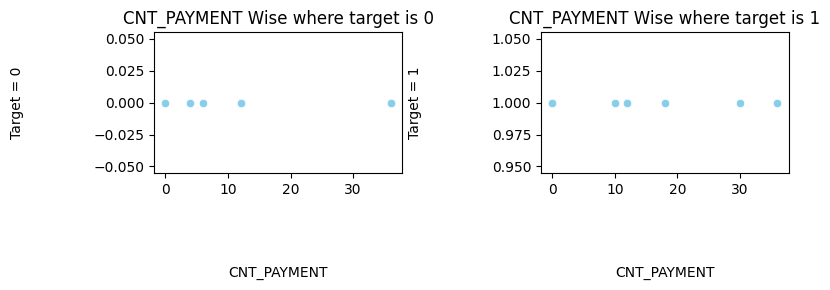

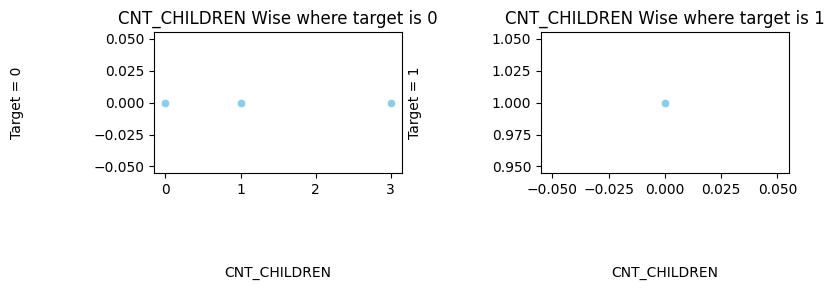

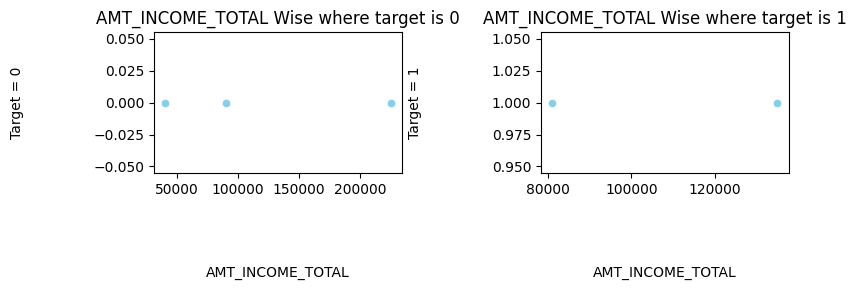

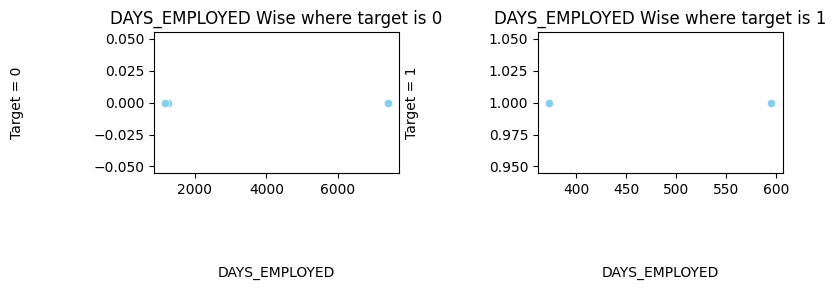

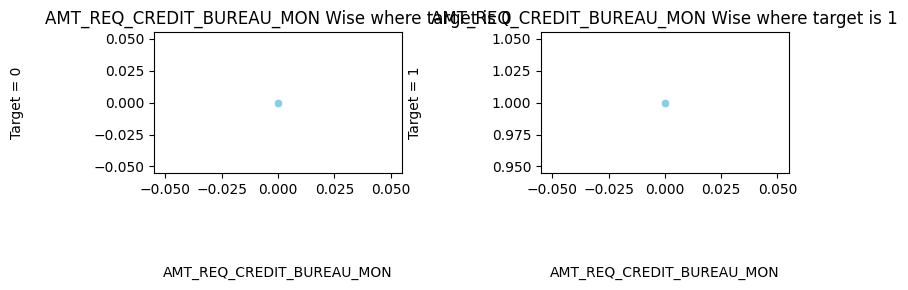

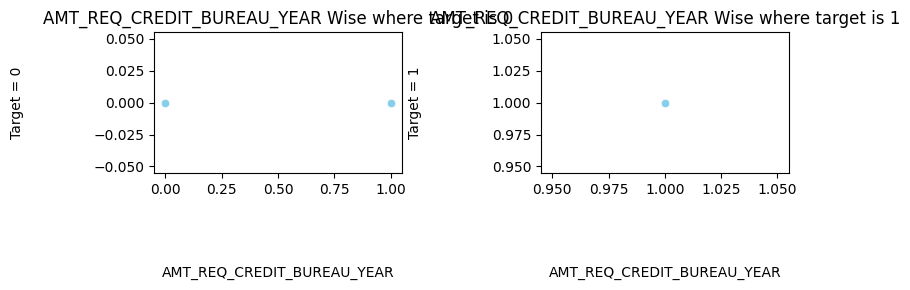

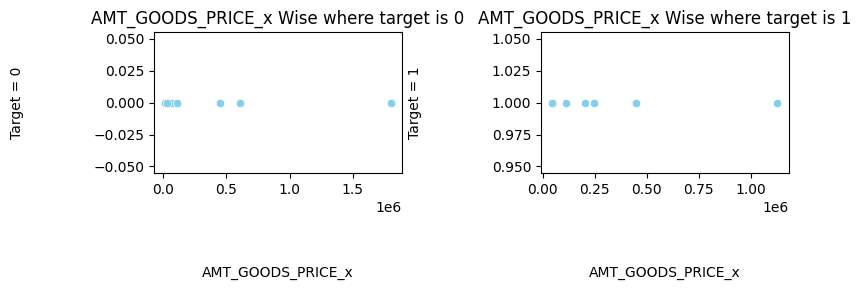

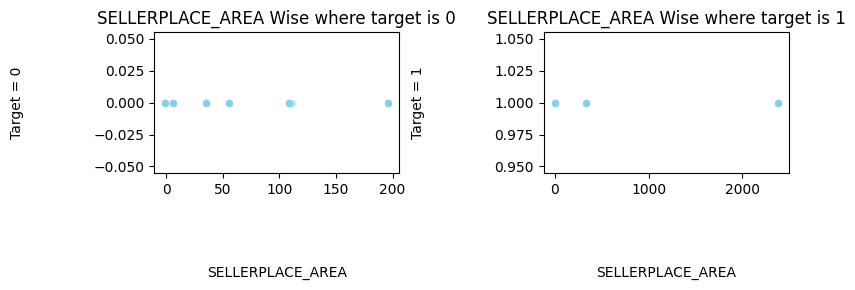

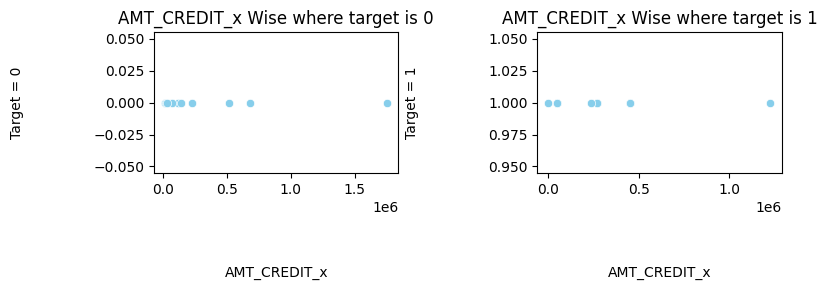

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_side_by_side_scatter(df, continuous_col):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Plot for TARGET == 0
    sns.scatterplot(x=continuous_col, y='TARGET', data=df[df['TARGET'] == 0].head(10), color='skyblue', ax=axes[0])
    axes[0].set_title(f'{continuous_col} Wise where target is 0')
    axes[0].set_xlabel(continuous_col)
    axes[0].set_ylabel('Target = 0')

    # Plot for TARGET == 1
    sns.scatterplot(x=continuous_col, y='TARGET', data=df[df['TARGET'] == 1].head(10), color='skyblue', ax=axes[1])
    axes[1].set_title(f'{continuous_col} Wise where target is 1')
    axes[1].set_xlabel(continuous_col)
    axes[1].set_ylabel('Target = 1')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
continuous_cols = ["AMT_APPLICATION", 'CNT_PAYMENT', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_MON', 
                   'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_GOODS_PRICE_x', 'SELLERPLACE_AREA', 'AMT_CREDIT_x']

for col in continuous_cols:
    plot_side_by_side_scatter(df, col)



Insights

People with target one has largely staggered income as compared to target zero. Scatter plot clearly shows that the shape in Income total, Annuity, Credit and Good Price is similar for Target 0 and similar for Target 1.


The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is procured and Annuity.

Also, all these graphs shows there was neutral relation between the targets. 





Bivariate Analysis: Numerical & Categorical

In [ ]:
df[['TARGET', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']]

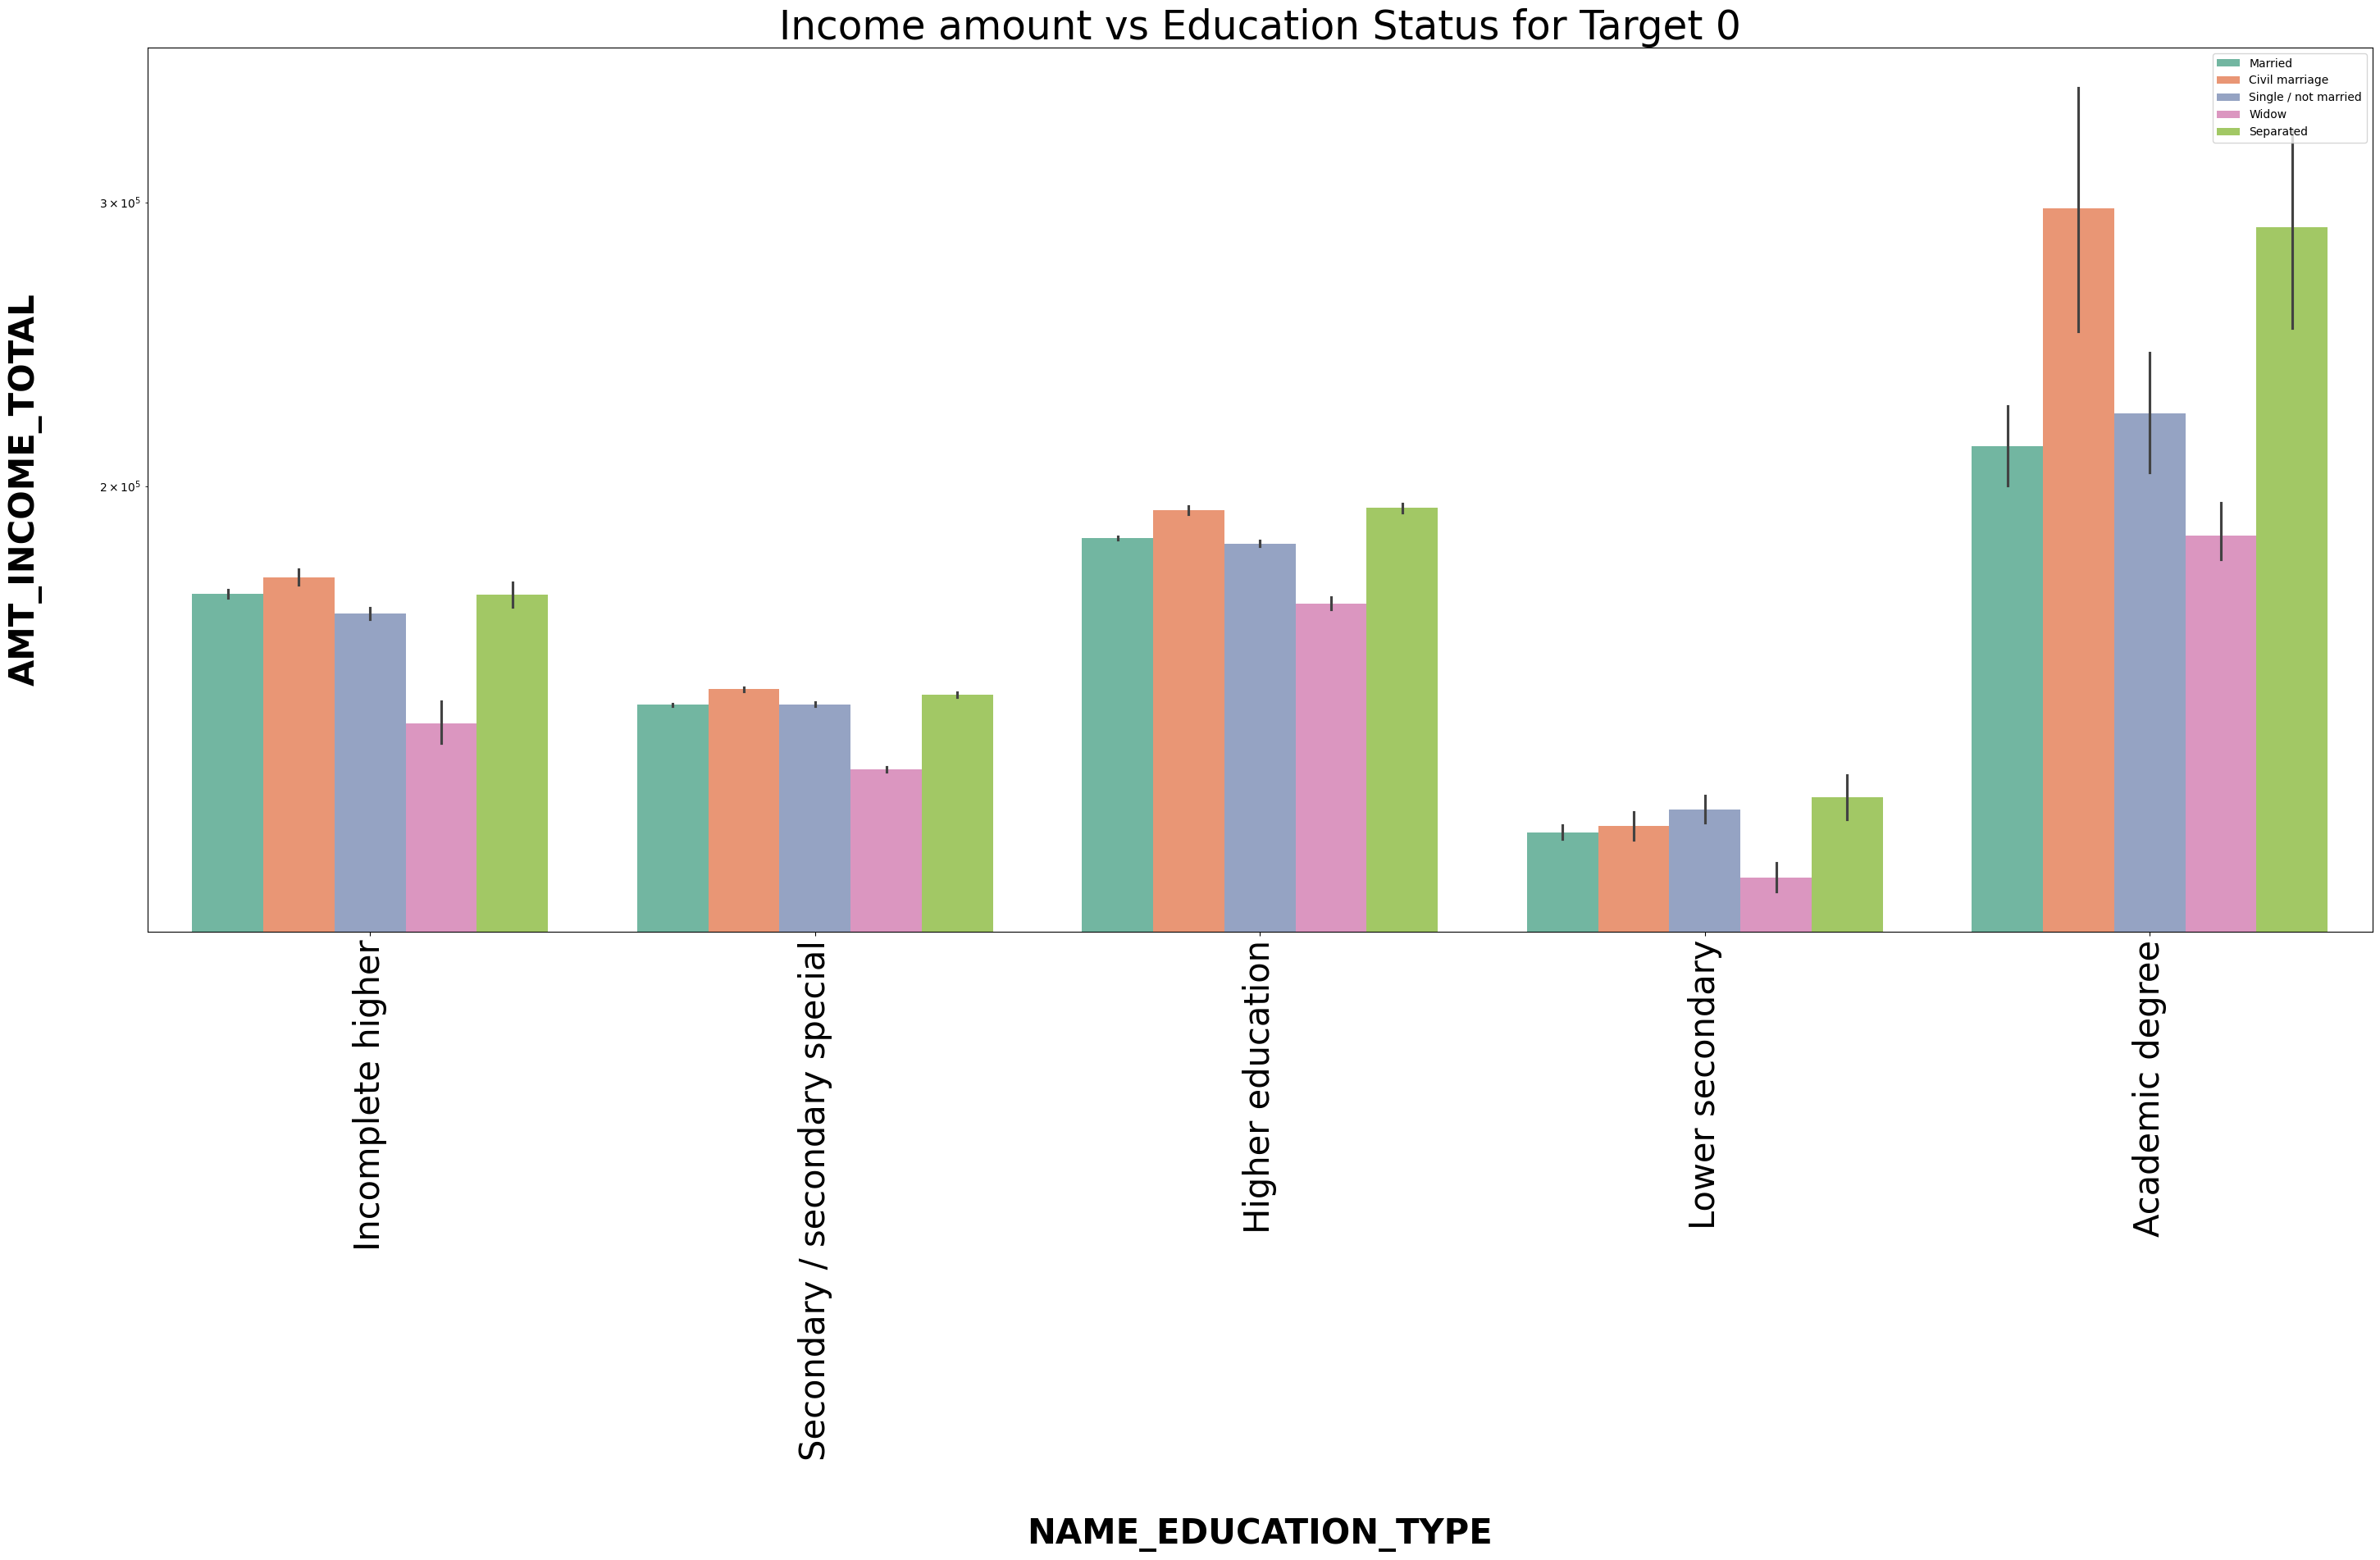

In [439]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.barplot(data =df[df['TARGET'] == 0], x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status for Target 0',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

(array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]),
 [Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$'),
  Text(0, 1000000.0, '$\\mathdefault{10^{6}}$'),
  Text(0, 10000000.0, '$\\mathdefault{10^{7}}$')])

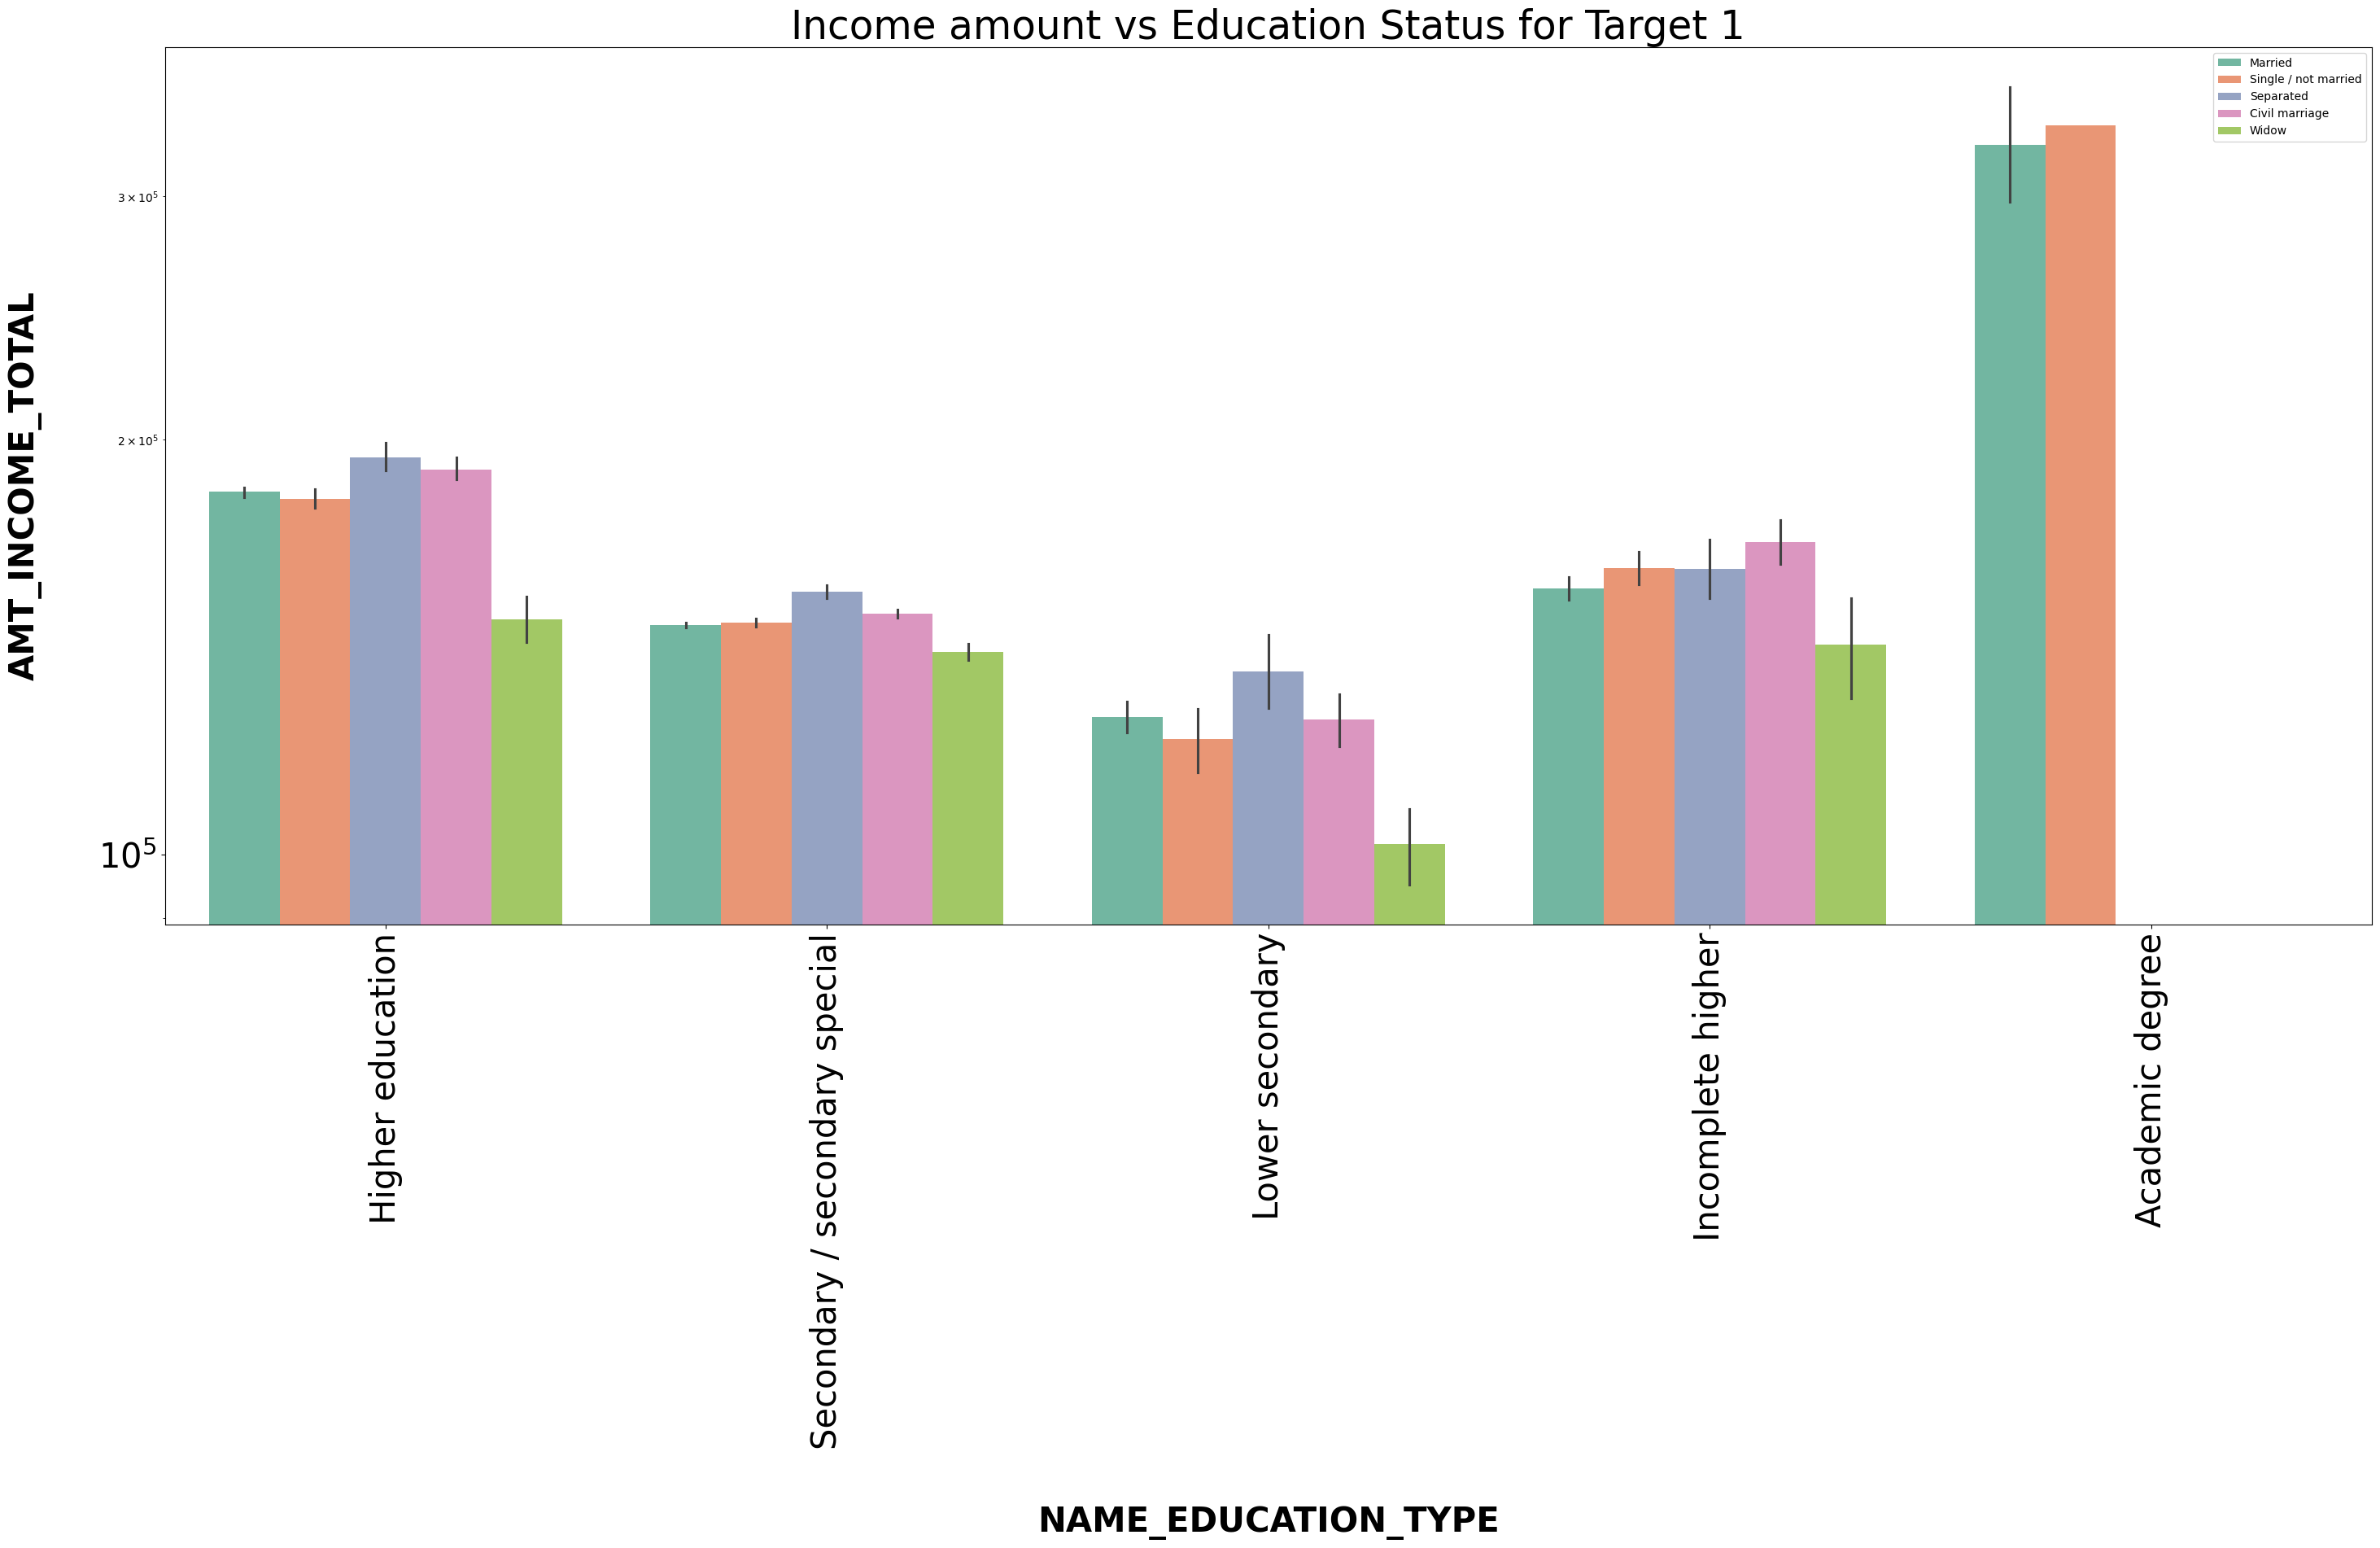

In [440]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.barplot(data =df[df['TARGET'] == 1], x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status for Target 1',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

Insights:

---Target 0

Clients with civil Marriage had high in annual income and they are good at repaying loans. 

Separated clients also doing good in terms of annual income and repaying loans. 

Widow clients shows very less annual income and seen some difficulties in repaying loans. 

So, as a Data scientist, the solution which given from this bivariant analysis was clients with Academic degree and Civil Marriage clients are good to approving loans. 


---Target 1

Insights:

Upon seeing that Single / Not married, married shows some difficulties in paying loans in Academic degree even they getting high Annual Income. 

In second place, clients with Higher education in all categories like Married, single, Widow were showing some difficulties in paying loans.

So, we can suggest Single & married on academic degree and lesser the education clients were facing some difficulties in paying loan. 

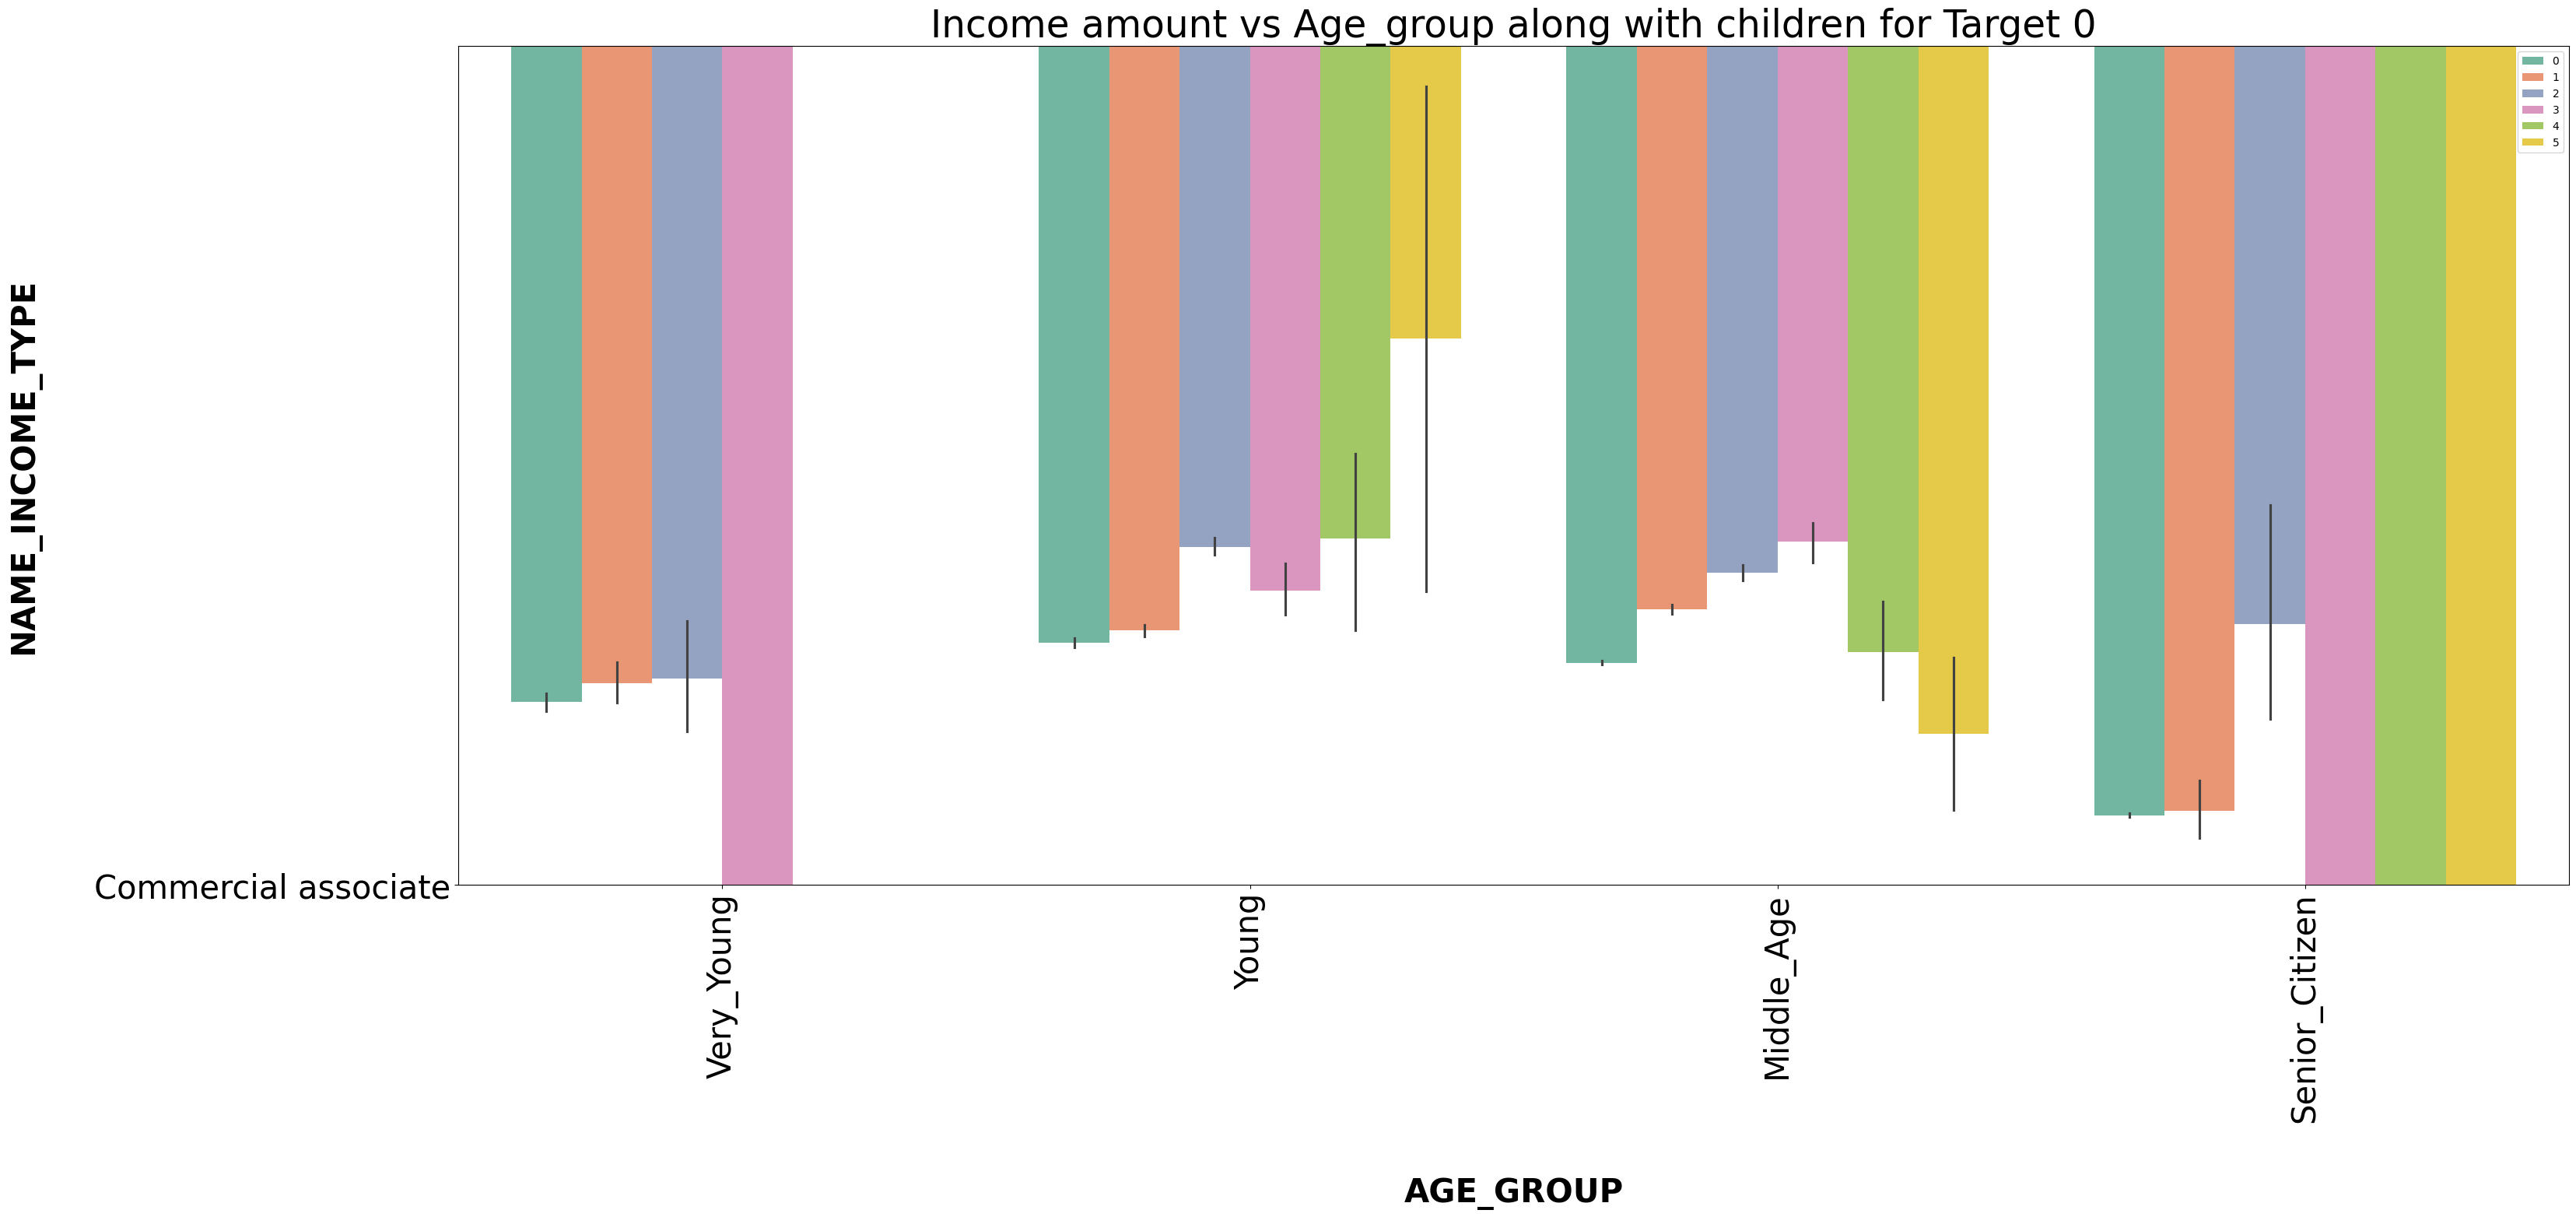

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 14))
plt.yscale('log')
plt.xticks(rotation=90)

# Filter the DataFrame for 'TARGET' == 0 and 'CNT_CHILDREN' <= 5
filtered_df = df[(df['TARGET'] == 0) & (df['CNT_CHILDREN'] <= 5)]

# Set y-axis to logarithmic scale
g = sns.barplot(data=filtered_df, x='AGE_GROUP', y='NAME_INCOME_TYPE',
                hue='CNT_CHILDREN', orient='v', palette='Set2')

# Adjust the y-axis limits
g.set(ylim=(1, None))

plt.legend(loc='upper right')
plt.title('Income amount vs Age_group along with children for Target 0', fontsize=35)
plt.xlabel("AGE_GROUP", fontsize=30, fontweight="bold")
plt.ylabel("NAME_INCOME_TYPE", fontsize=30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


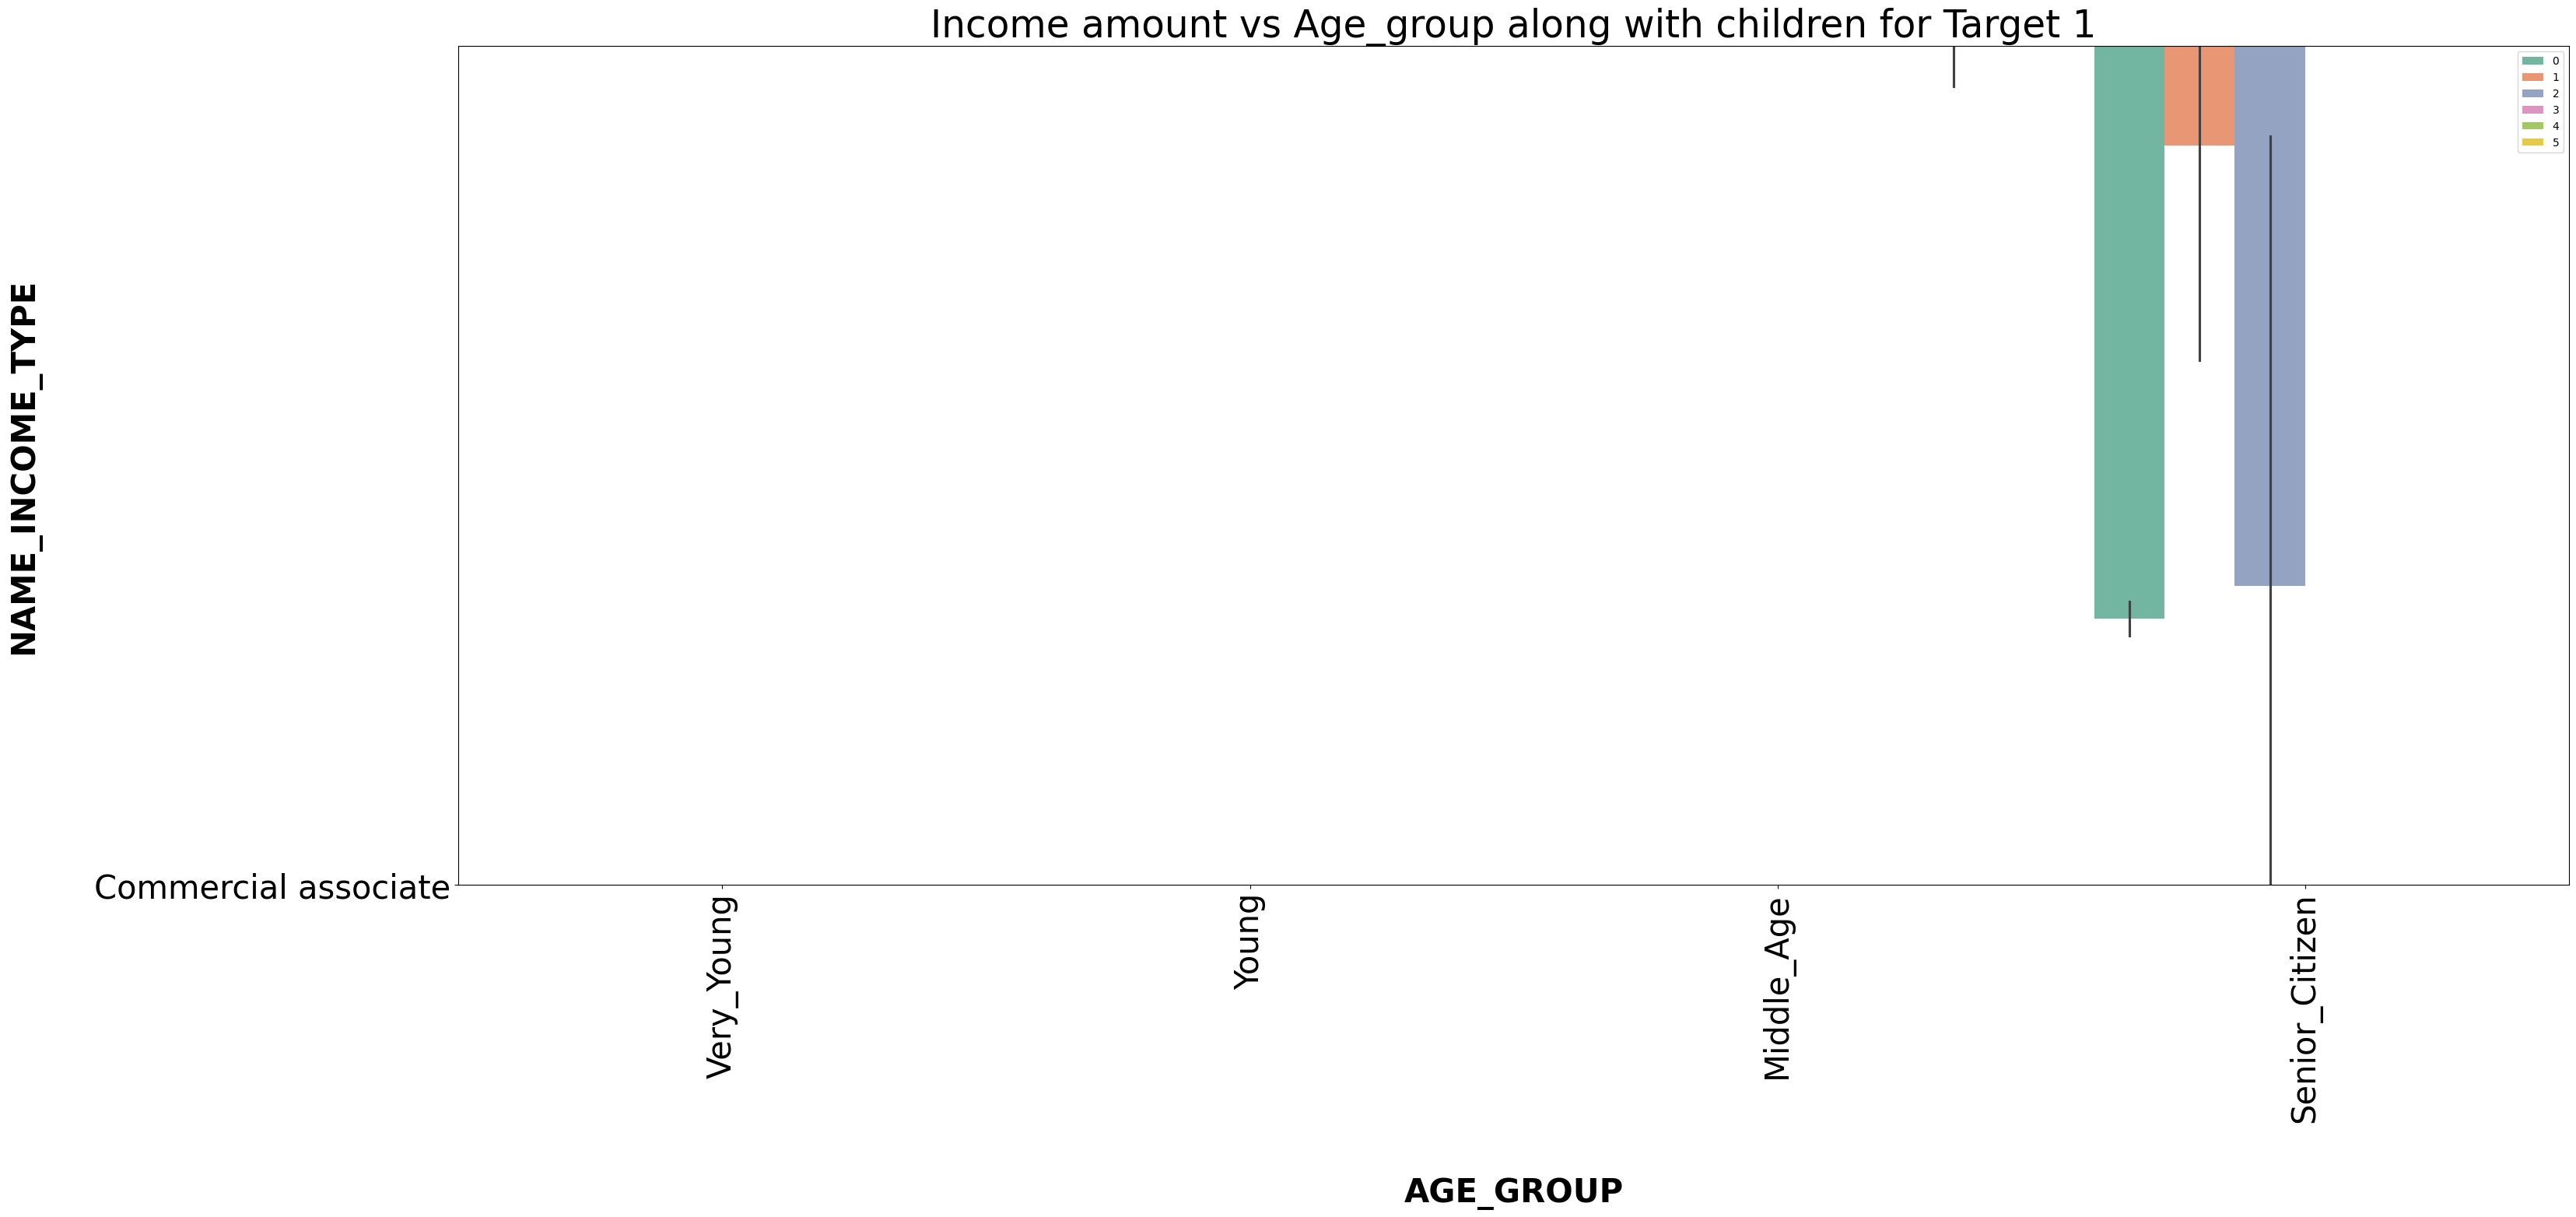

In [457]:
plt.figure(figsize=(35, 14))
plt.yscale('log')
plt.xticks(rotation=90)

# Filter the DataFrame for 'TARGET' == 1 and 'CNT_CHILDREN' <= 5
filtered_df = df[(df['TARGET'] == 1) & (df['CNT_CHILDREN'] <= 5)]

# Set y-axis to logarithmic scale
g = sns.barplot(data=filtered_df, x='AGE_GROUP', y='NAME_INCOME_TYPE',
                hue='CNT_CHILDREN', orient='v', palette='Set2')

# Adjust the y-axis limits
g.set(ylim=(1, None))

plt.legend(loc='upper right')
plt.title('Income amount vs Age_group along with children for Target 1', fontsize=35)
plt.xlabel("AGE_GROUP", fontsize=30, fontweight="bold")
plt.ylabel("NAME_INCOME_TYPE", fontsize=30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


Insights:

Target 0

Senior citizen clients with children above 3 have high Annual income and good in paying loans.

Middle aged clients also shows same with senior citizen but some less Annual income while comparing to senior citizen. 

When comming to vey young clients, we can see there had no children above 3. 

Upon these analysis, clients with no children shows good in paying loan.

Target 1:

Senior citizen with no children and upto children were not goot at paying loans. 

Also, upon checking, other categories had no defaulters in paying the loans in terms of children. 

In [458]:
df.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0            Married  House / apartment           7392             8447.0   
1            Married  House / apartment           7392             8447.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             4120           1               1                0   
1             4120           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              3.0   
1                 1           1           0        Laborers              3.0   

   REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                     1                           1                       0   
1                     1                           1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Military   
1                       0                        0          Military   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.683797                       3.0                       0.0   
1      0.683797                       3.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       3.0                       0.0                   548.0   
1                       3.0                       0.0                   548.0   



Credit V/s Education

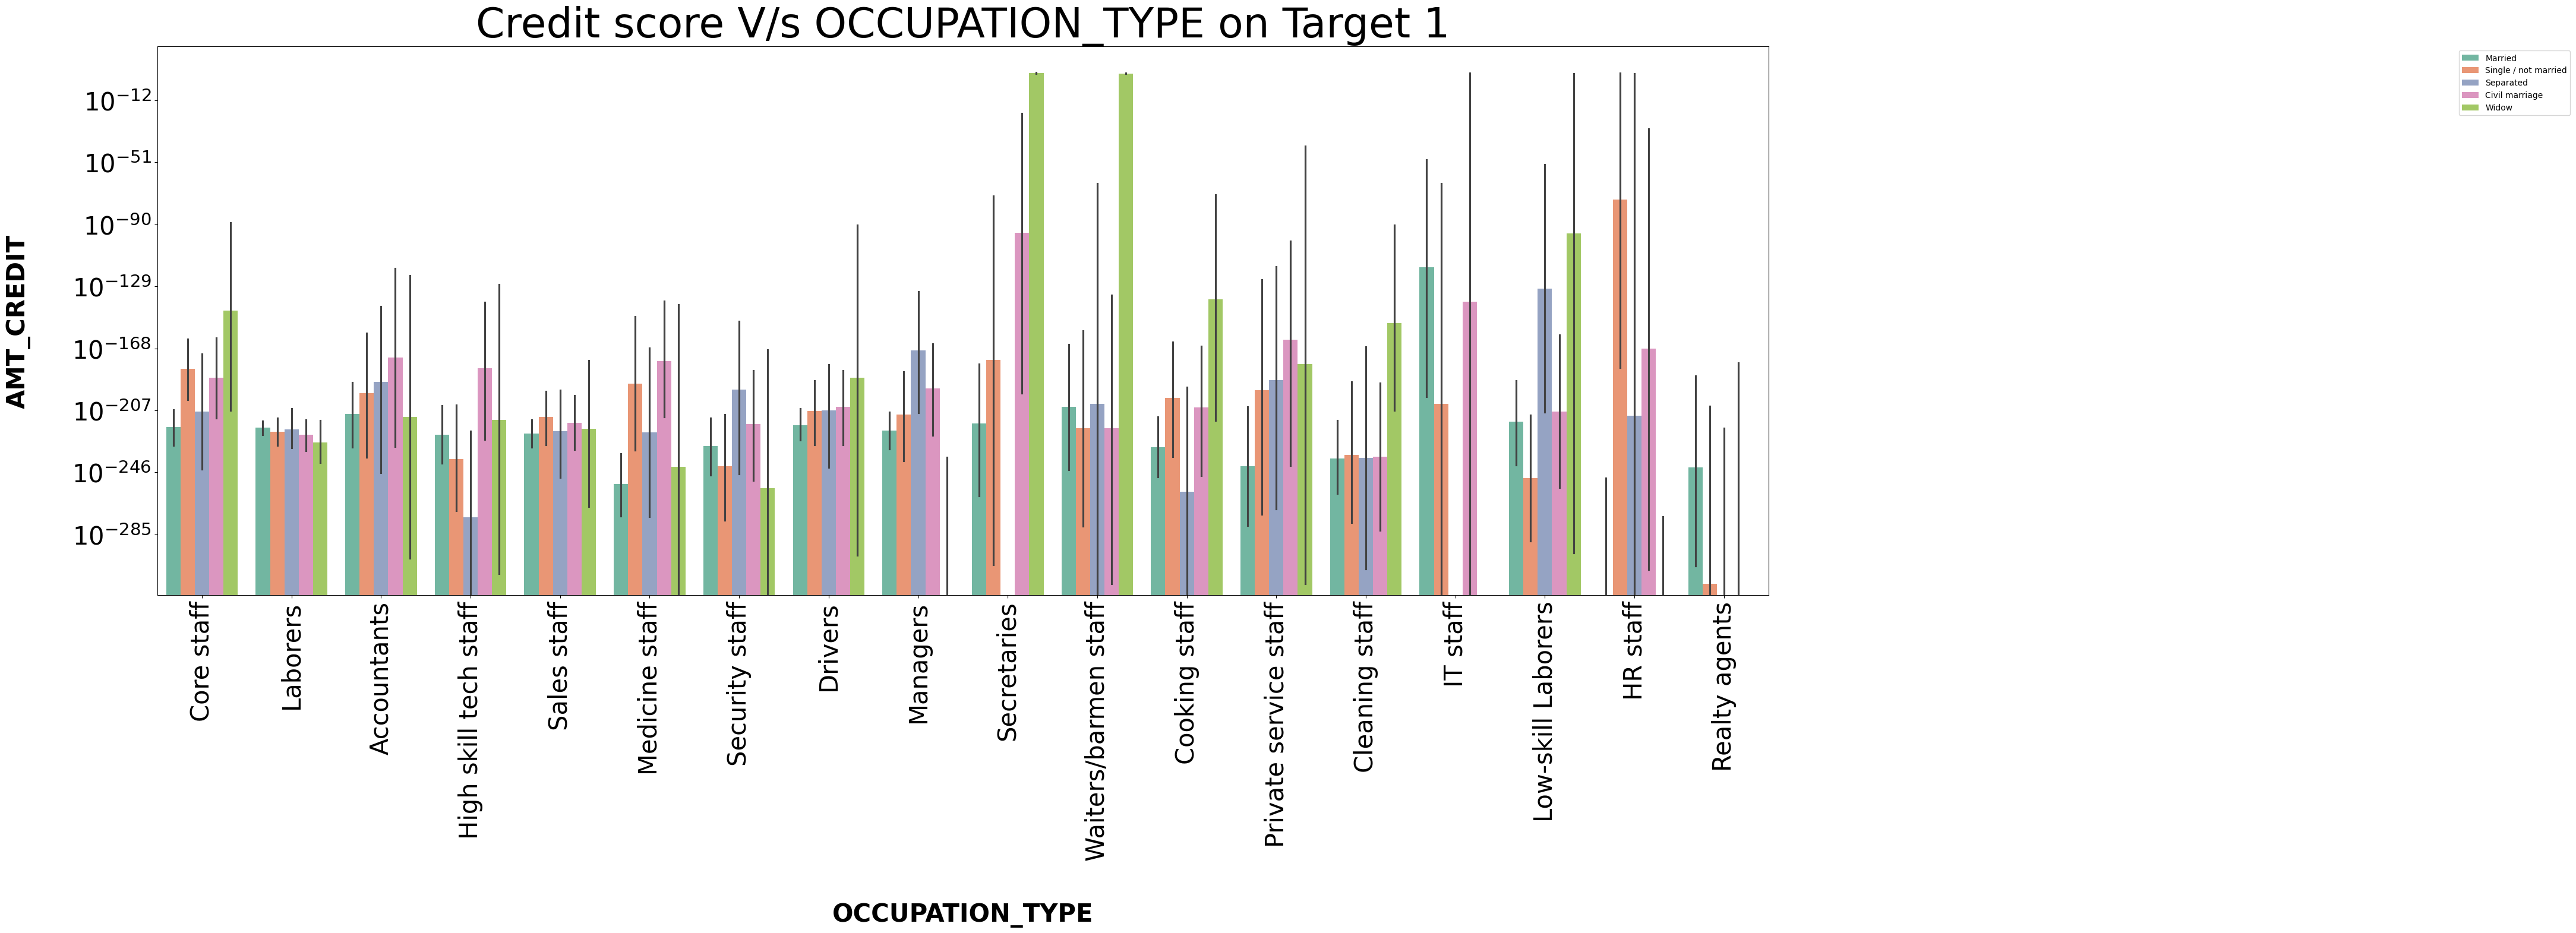

In [472]:
plt.figure(figsize=(35,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.barplot(data =df[df['TARGET'] == 1], x='OCCUPATION_TYPE',y='AMT_CREDIT_x',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit score V/s OCCUPATION_TYPE on Target 1',fontsize=50 )
plt.xlabel("OCCUPATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

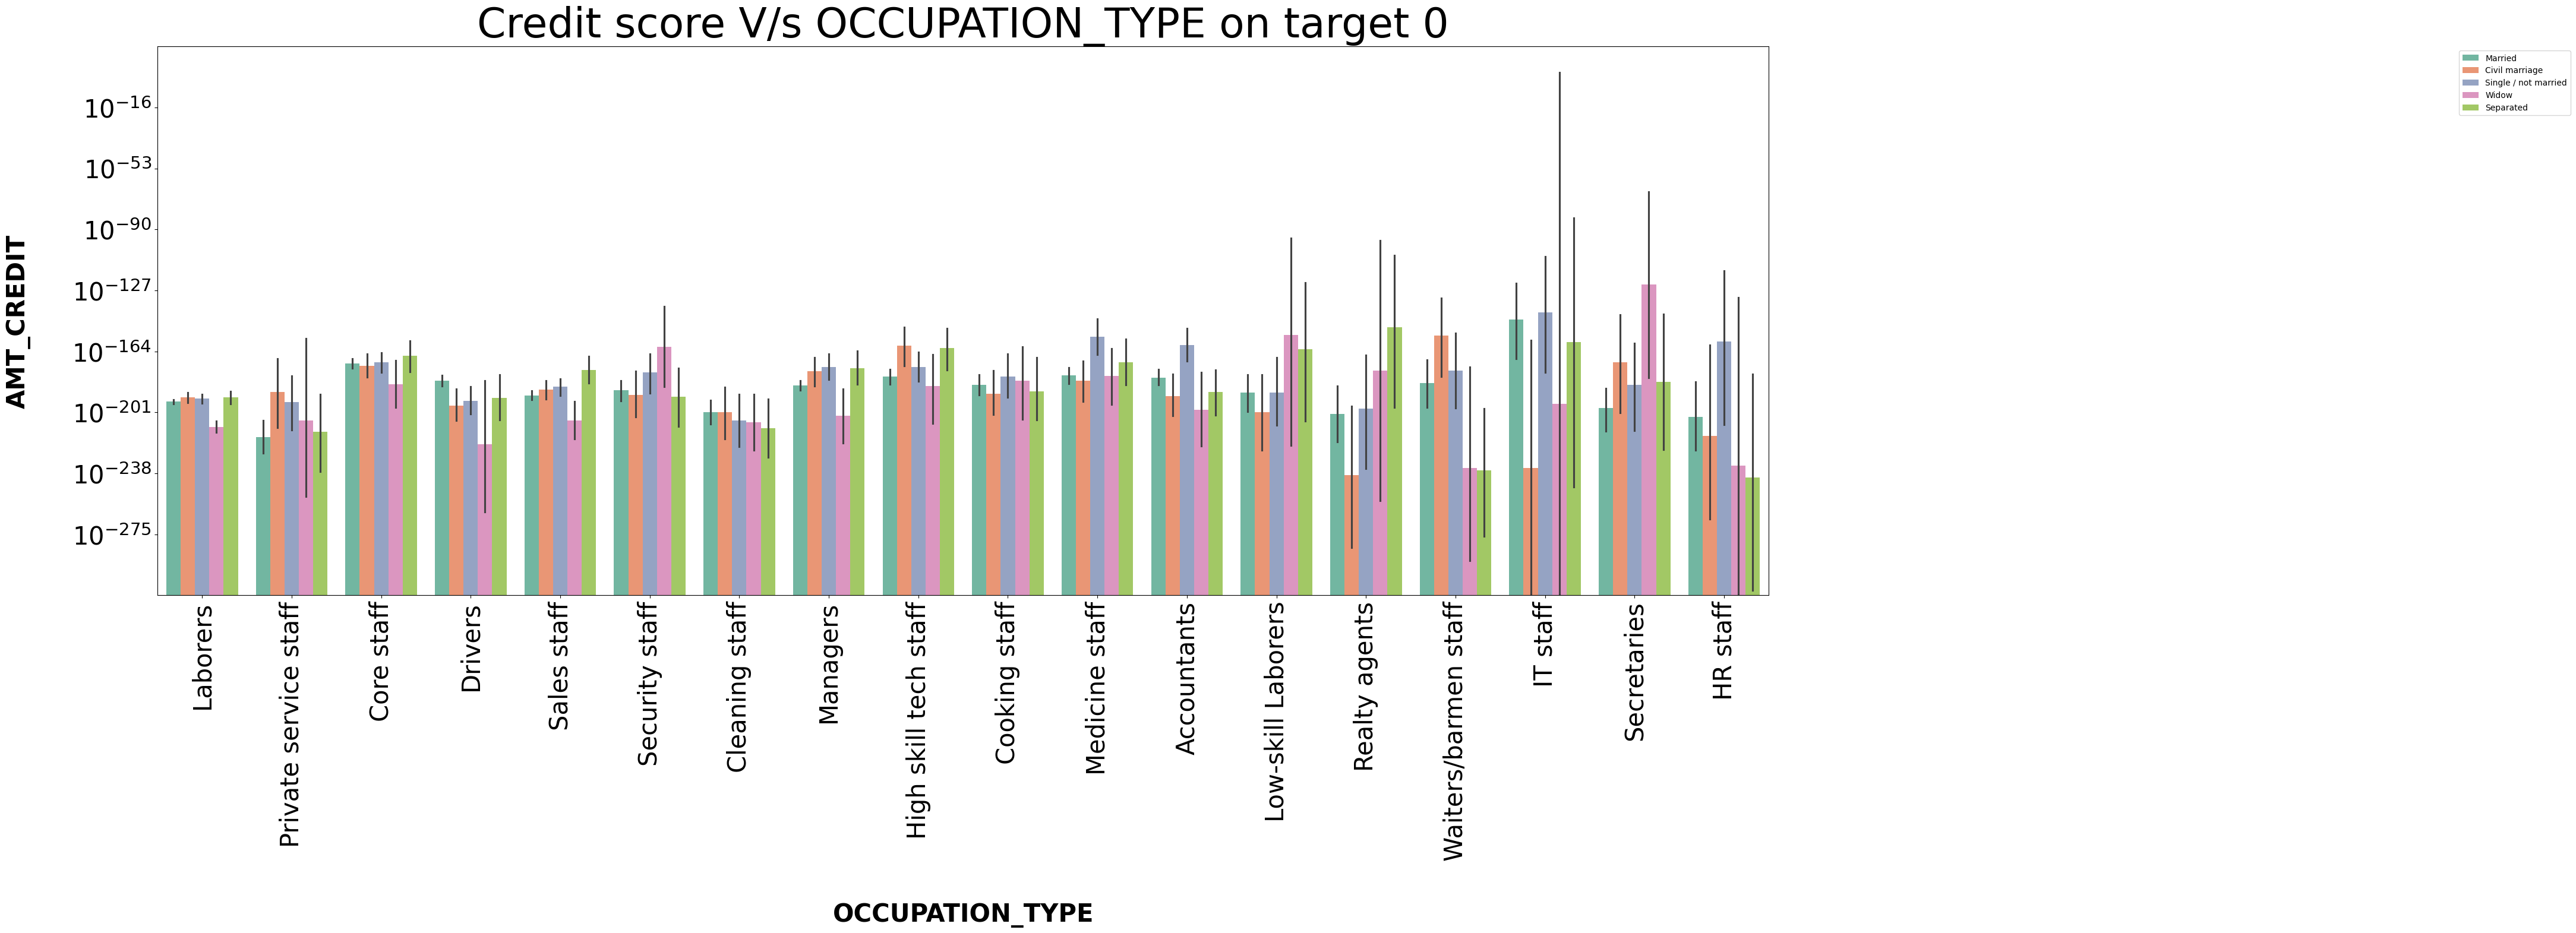

In [473]:
plt.figure(figsize=(35,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.barplot(data =df[df['TARGET'] == 0], x='OCCUPATION_TYPE',y='AMT_CREDIT_x',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit score V/s OCCUPATION_TYPE on target 0',fontsize=50 )
plt.xlabel("OCCUPATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Insights:

Credit score on occupation types. 

clients working on secretaries, IT staffs, HR staff had high credit score. 

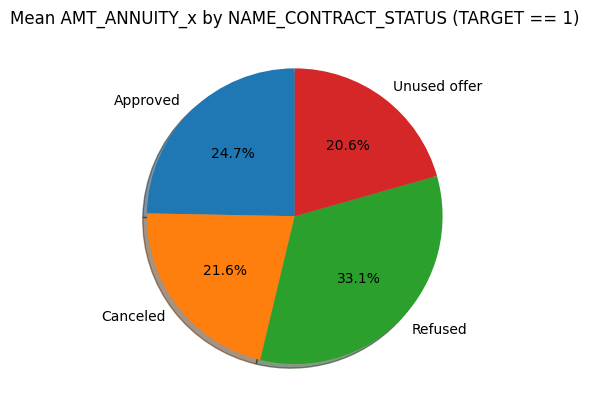

In [490]:
result = df[df['TARGET'] == 1].groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].mean()

# Plot a pie chart
plt.pie(result, labels=result.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('avg AMT_ANNUITY_x by NAME_CONTRACT_STATUS (TARGET == 1)')
plt.show()

Insights!!

upon checking 24% loans were approved and 21% were cancelled. 

It seems that 33% were refused by clients

In [ ]:
df['NAME_CONTRACT_TYPE_x']

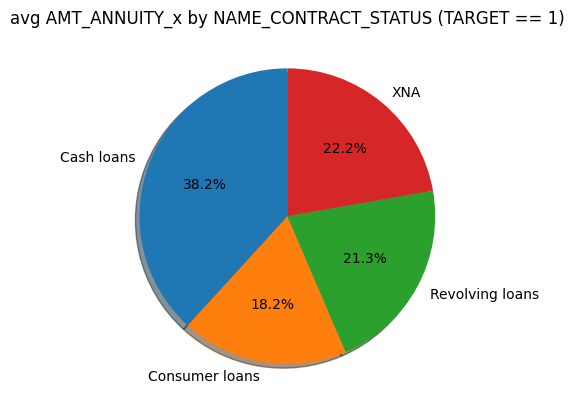

In [529]:
result = df[df['TARGET'] == 1].groupby('NAME_CONTRACT_TYPE_x')['AMT_ANNUITY_x'].mean()

# Plot a pie chart
plt.pie(result, labels=result.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('avg AMT_ANNUITY_x by NAME_CONTRACT_STATUS (TARGET == 1)')
plt.show()

Insights:

Cash loans ---- with 38.2% had high in risk and in 2nd place XNA of 22.2%

So, cash loans and XNA, revolving loans are at high risk loans in repayment

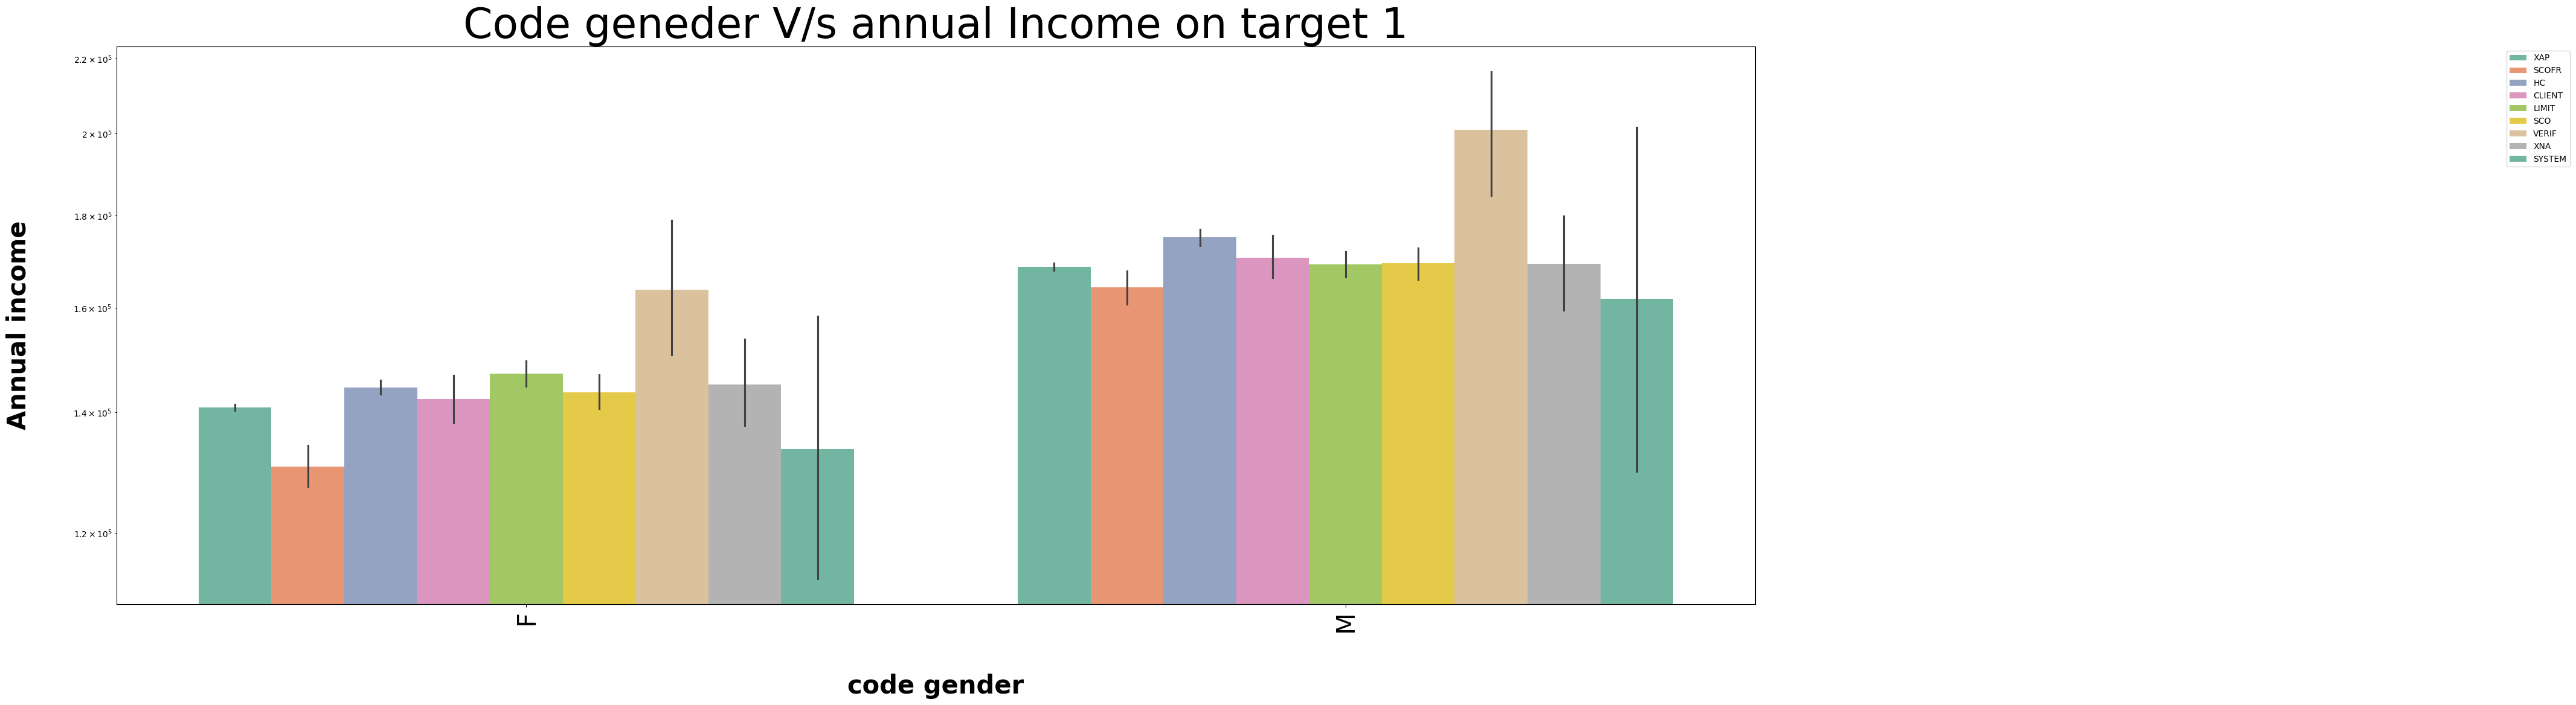

In [530]:
plt.figure(figsize=(35,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.barplot(data =df[df['TARGET'] == 1], x='CODE_GENDER',y='AMT_INCOME_TOTAL',      #Boxplot w.r.t Data Target 1
            hue ='CODE_REJECT_REASON',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Code geneder V/s annual Income on target 1',fontsize=50 )
plt.xlabel("code gender",fontsize= 30, fontweight="bold")
plt.ylabel("Annual income",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Insights:

code reject reasons on Male and female categories like

Due to Limit exceed, XNA had high contribution. In which Male had high number of rejection while comparing to females.

Lets see the annual income on Male and Female will give strong ingights why there was so many rejection for Males. 

<Axes: xlabel='CODE_GENDER'>

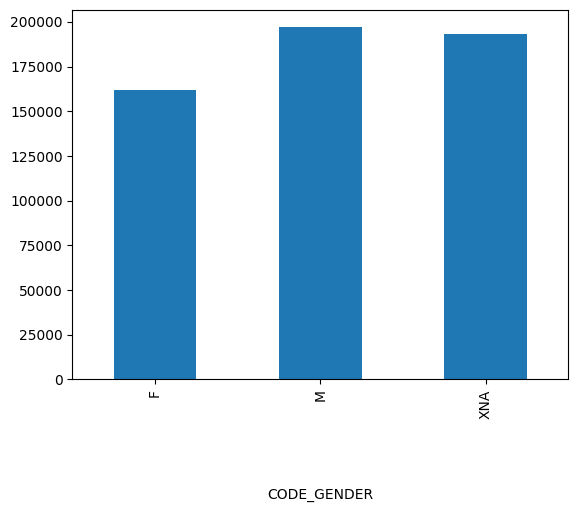

In [493]:
df.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean( ).plot.bar()

While comparing to Females, males had high annual income!!

In [499]:
df['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: count, dtype: int64

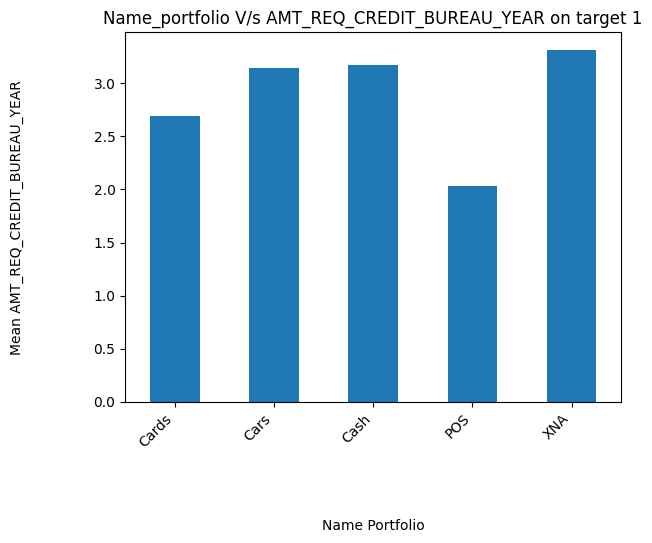

In [509]:
df[df['TARGET'] == 1].groupby('NAME_PORTFOLIO')['AMT_REQ_CREDIT_BUREAU_YEAR'].mean().plot.bar()

plt.title('Name_portfolio V/s AMT_REQ_CREDIT_BUREAU_YEAR on target 1')
plt.xlabel('Name Portfolio')
plt.ylabel('Mean AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insights:

XNA, CASH, CARS, CARDS port folio had high risk of payments in terms of REQ credit Bureu

In [510]:
df.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0            Married  House / apartment           7392             8447.0   
1            Married  House / apartment           7392             8447.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             4120           1               1                0   
1             4120           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              3.0   
1                 1           1           0        Laborers              3.0   

   REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                     1                           1                       0   
1                     1                           1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Military   
1                       0                        0          Military   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.683797                       3.0                       0.0   
1      0.683797                       3.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       3.0                       0.0                   548.0   
1                       3.0                       0.0                   548.0   



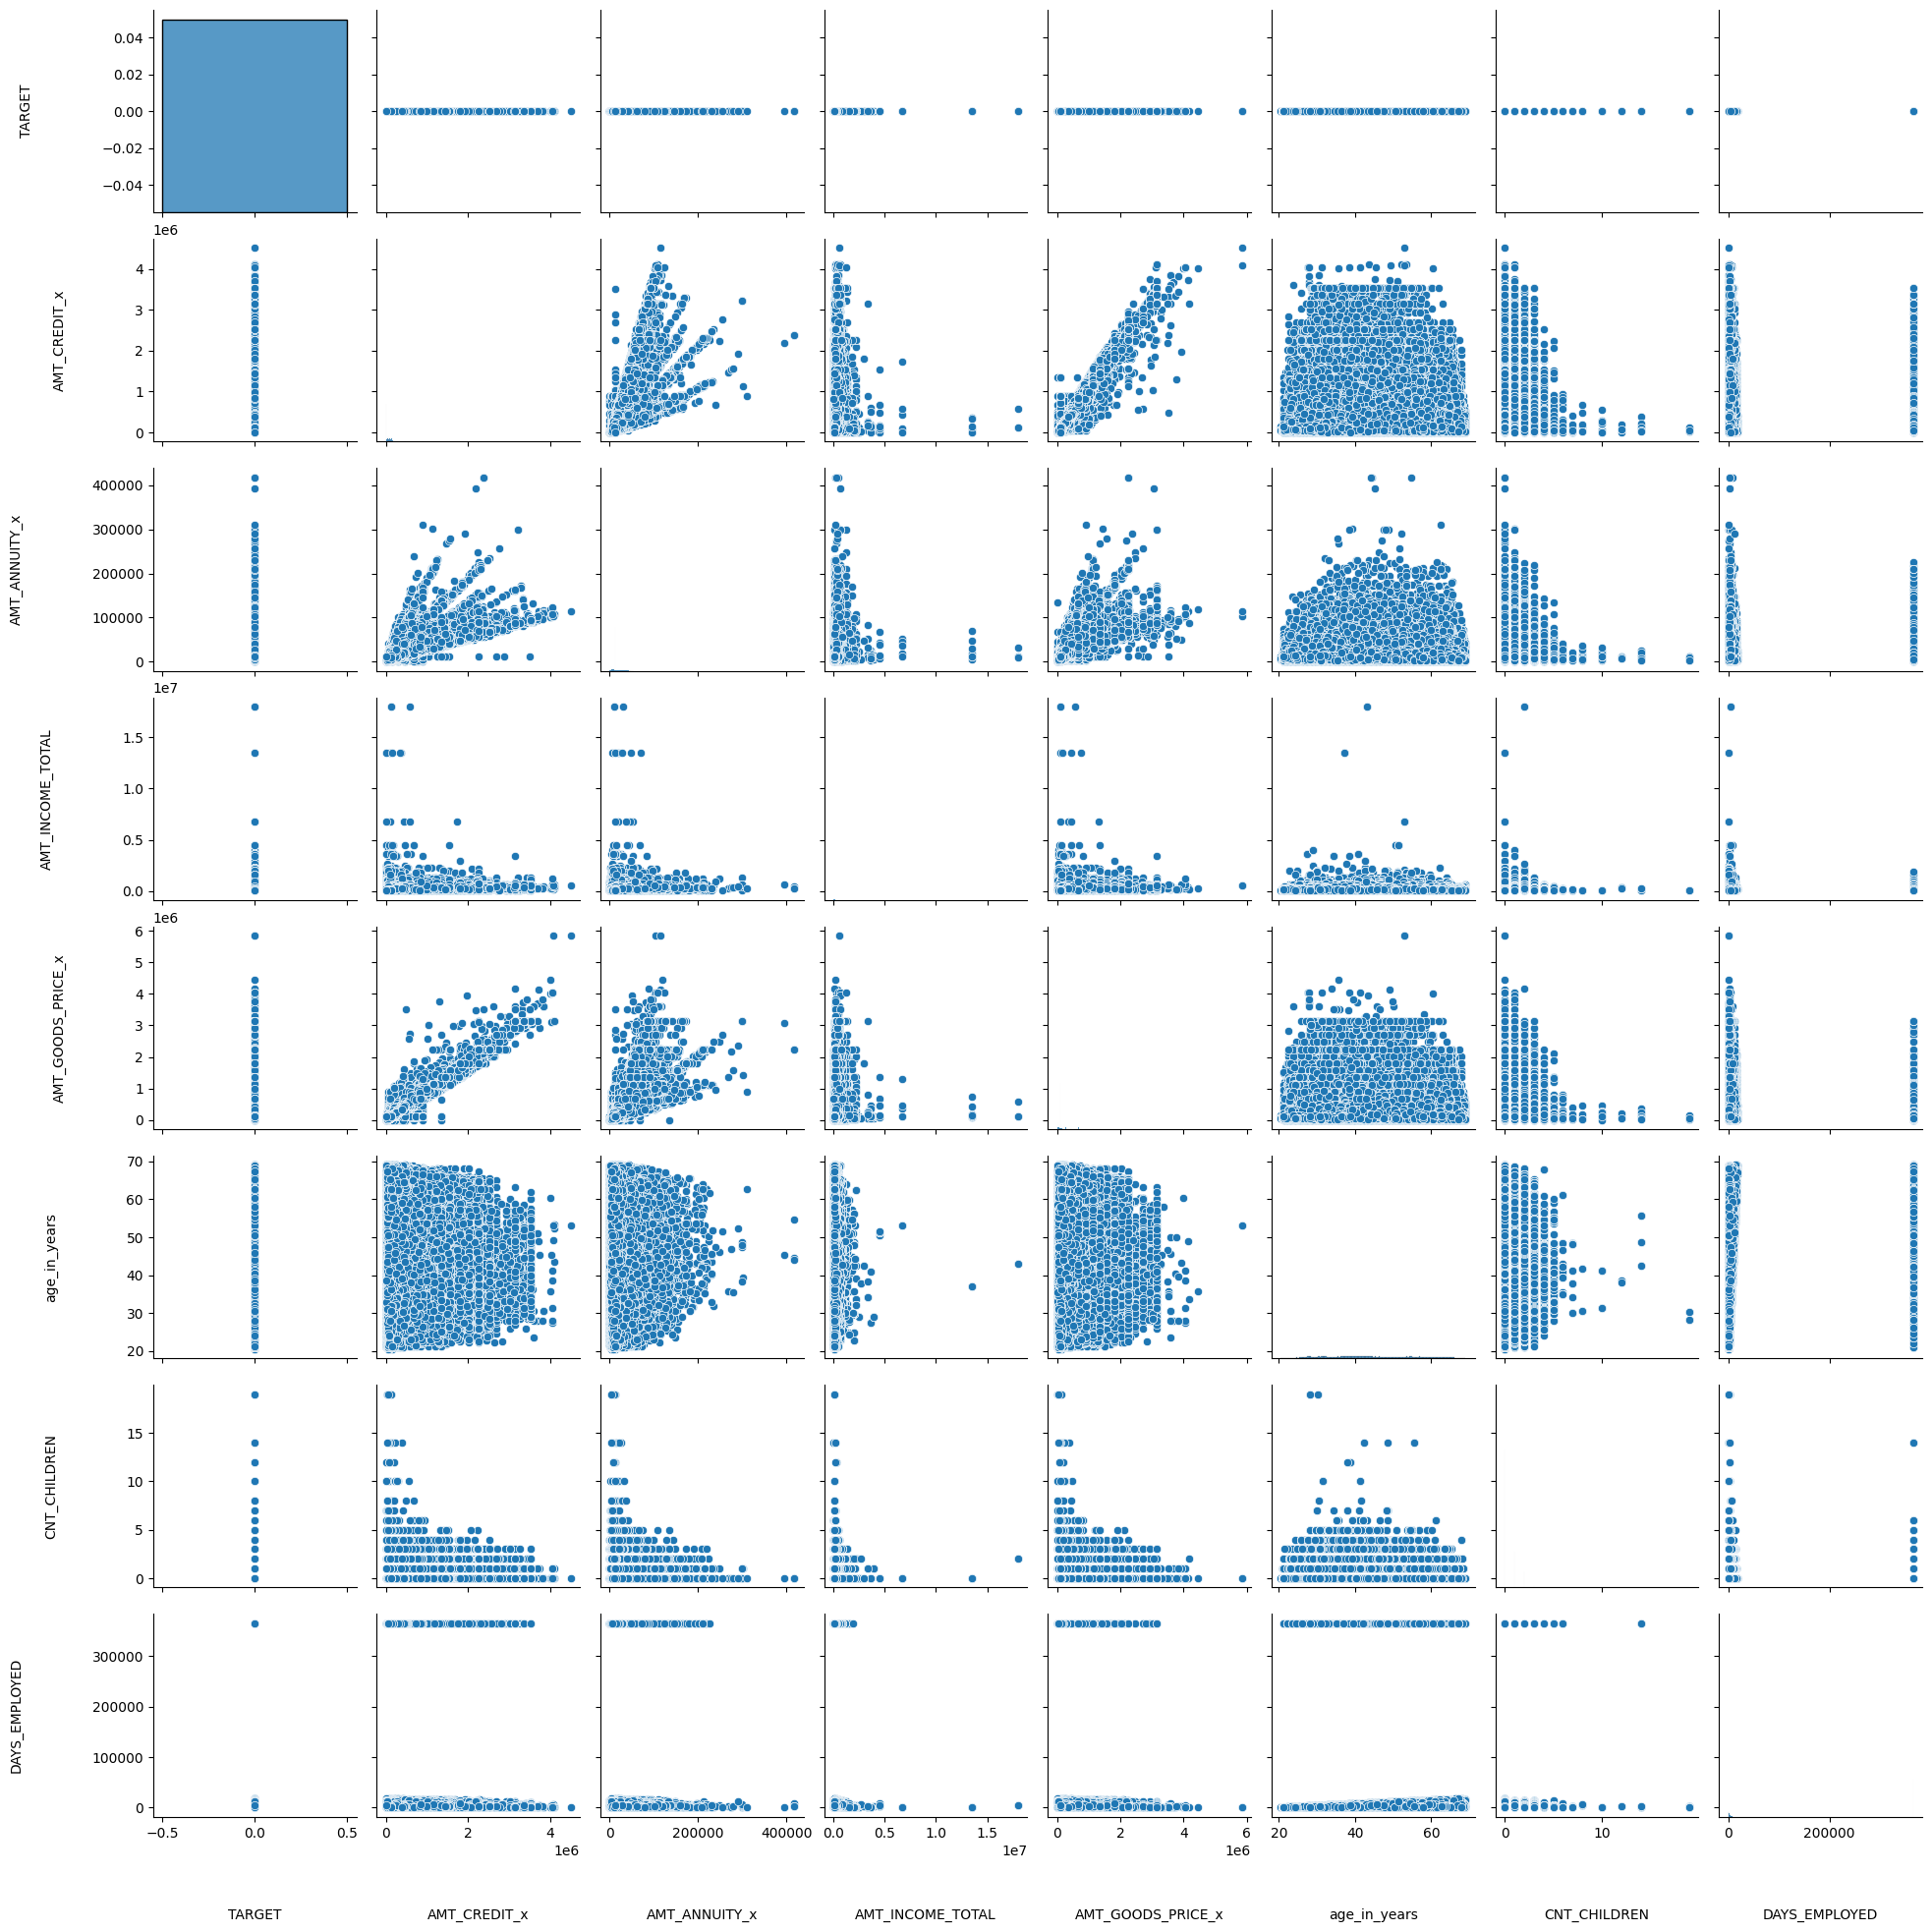

In [525]:
pair = df.loc[df["TARGET"]==0][['TARGET','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE_x', 'age_in_years','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

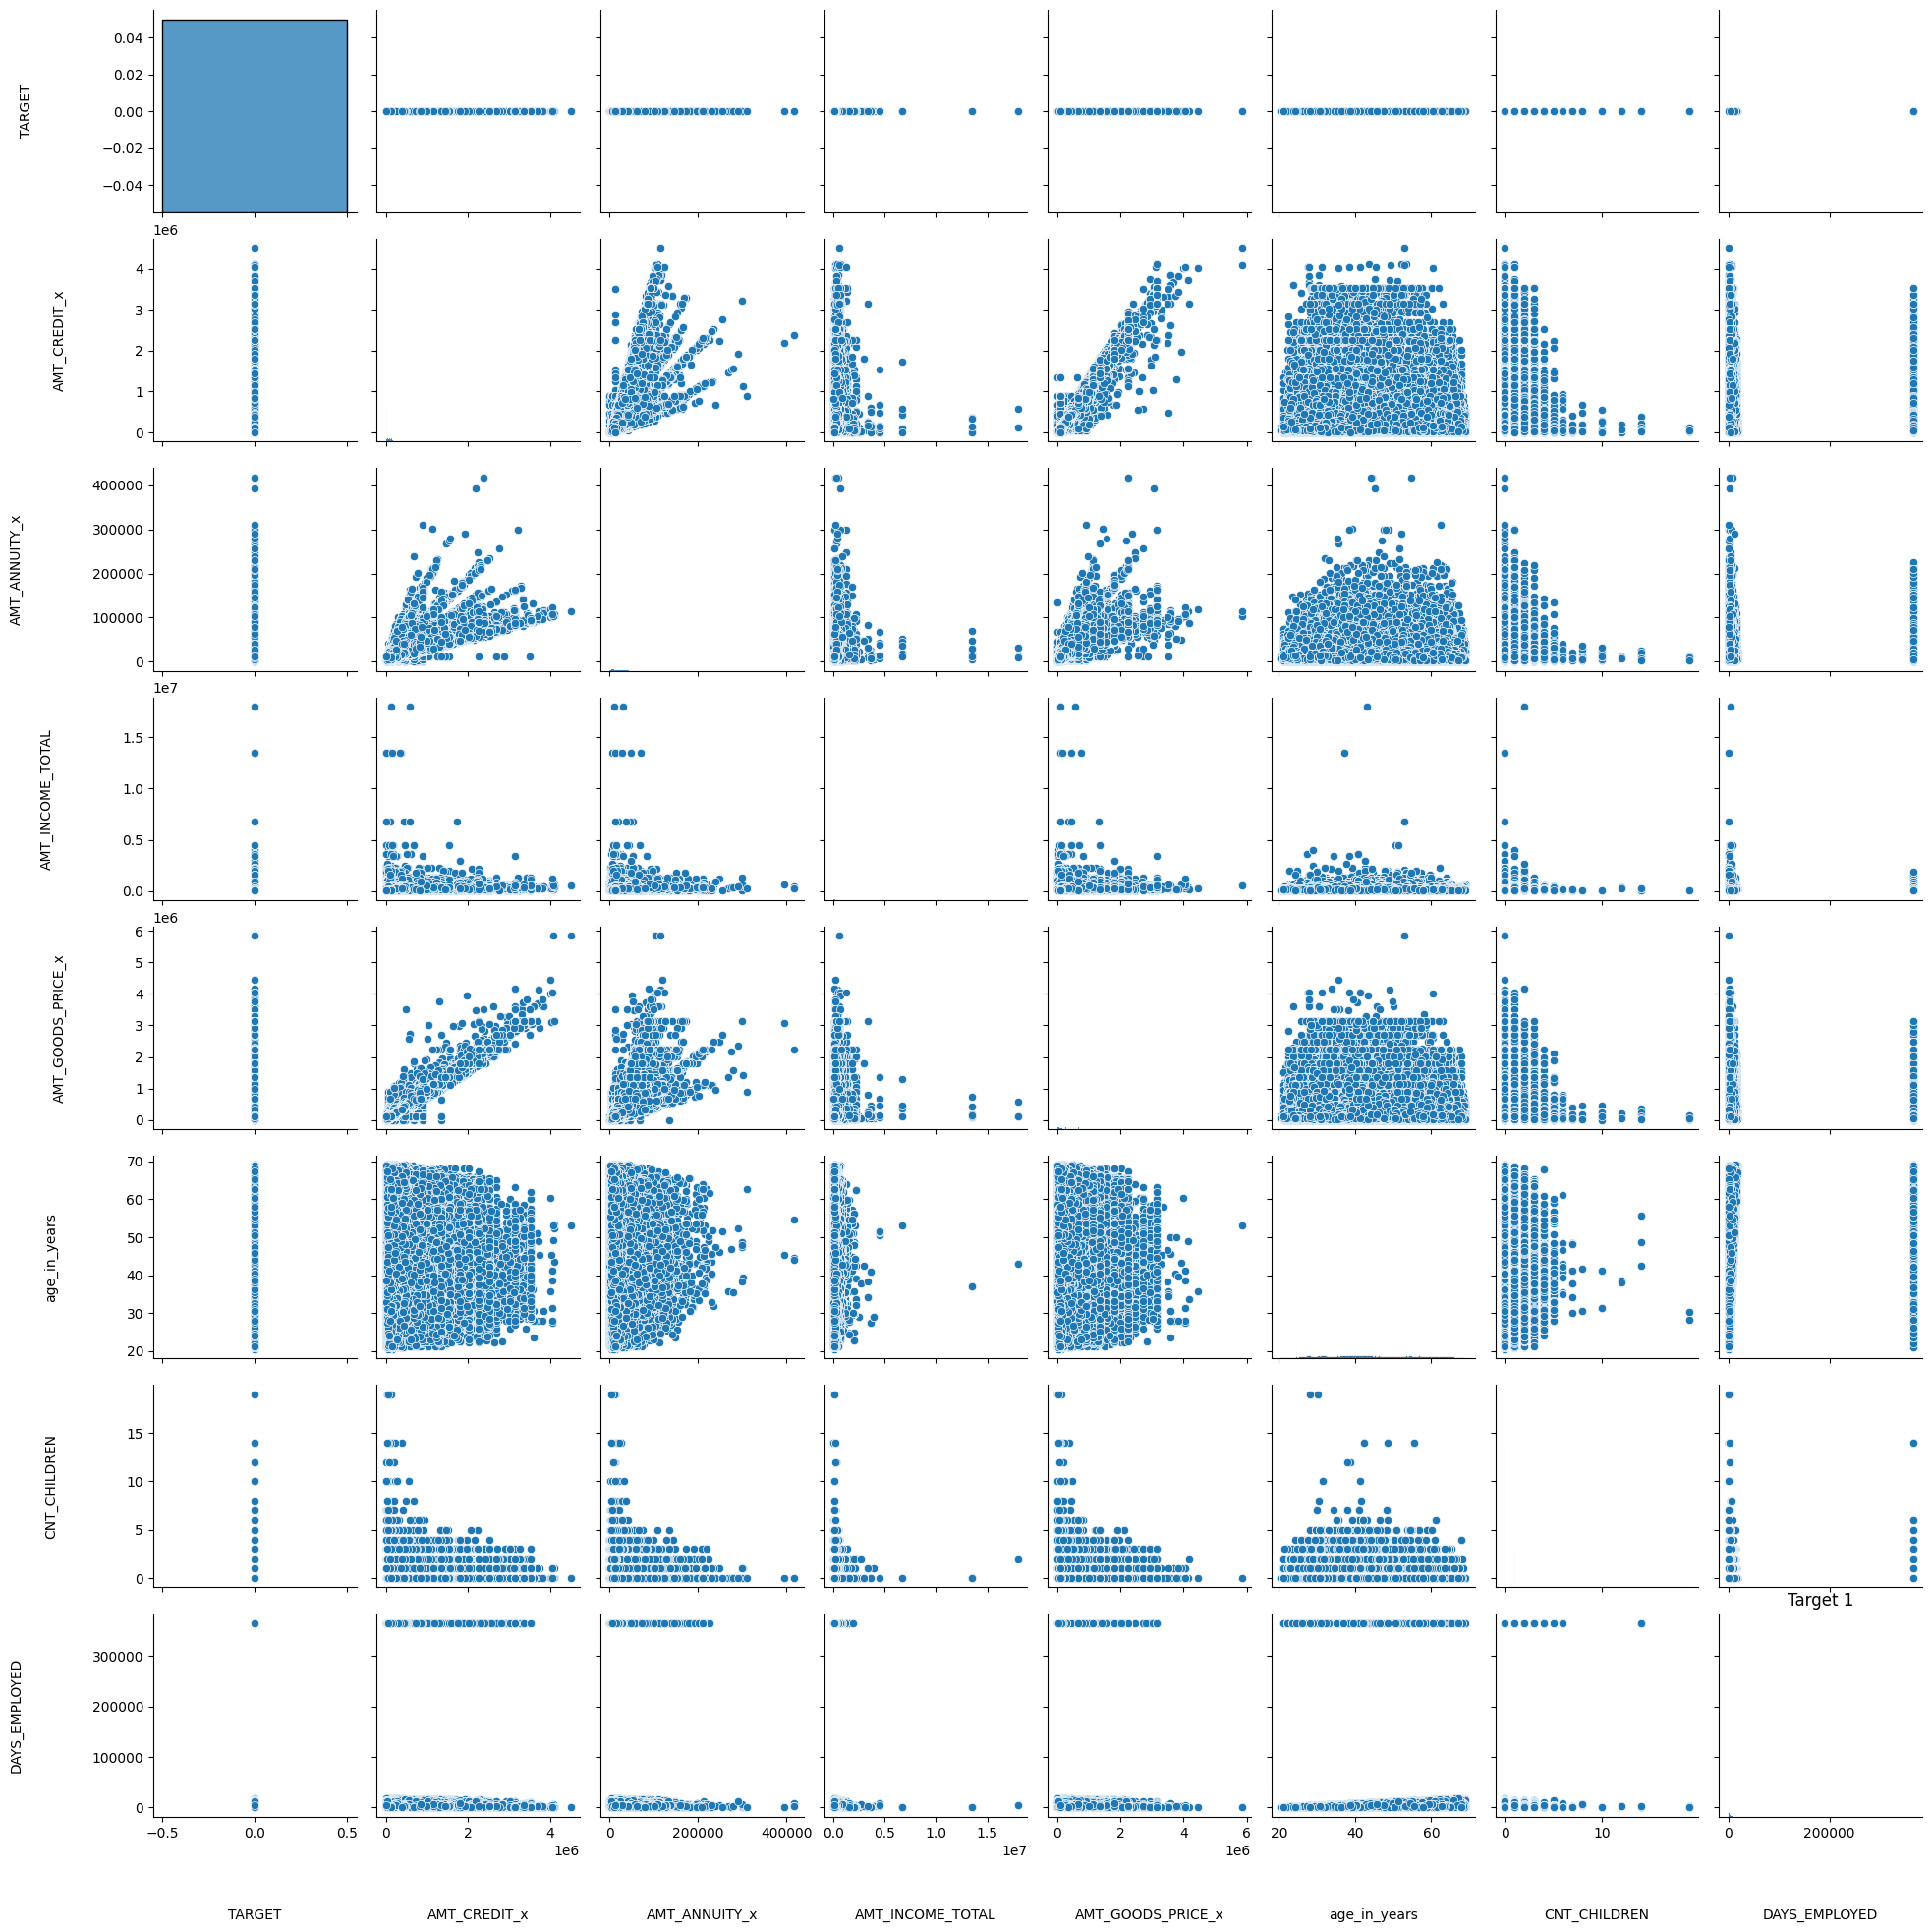

In [526]:
pair = df.loc[df["TARGET"]==0][['TARGET','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE_x', 'age_in_years','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)
plt.title('Target 1')
plt.show()

Insights

AMT_CREDIT is inversely proportional to the DAYS_BIRTH , peoples belong to the low-age group taking high Credit amount and vice-versa

AMT_CREDIT is inversely proportional to the CNT_CHILDREN, means the Credit amount is higher for fewer children count clients have and vice-versa.

AMT_INCOME_TOTAL is inversely proportional to the CNT_CHILDREN, means more income for fewer children clients have and vice-versa.

fewer children clients have in a densely populated area.

AMT_CREDIT is higher in a densely populated area.

AMT_INCOME_TOTAL is also higher in a densely populated area.

In [531]:
df.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0            17145.0   
1        1800000.0     1754721.0          1800000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1              Refused            472  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0            42.0   
1       low_normal            365243.0           831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0           42.0              37.0   
1                      361.0          537.0             499.0   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0                        0.0       0           F            N               Y   
1                        0.0       0           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
0             1          225000.0    State servant   Incomplete higher   
1             1          225000.0    State servant   Incomplete higher   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0            Married  House / apartment           7392             8447.0   
1            Married  House / apartment           7392             8447.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             4120           1               1                0   
1             4120           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              3.0   
1                 1           1           0        Laborers              3.0   

   REGION_RATING_CLIENT  REG_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                     1                           1                       0   
1                     1                           1                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Military   
1                       0                        0          Military   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.683797                       3.0                       0.0   
1      0.683797                       3.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       3.0                       0.0                   548.0   
1                       3.0                       0.0                   548.0   



In [730]:
df.shape

(1413701, 72)

Removing columns which gives relevant information from both data, like previous application and current application data.

In [34]:
t0_remove  = ['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START_x' , 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'DAYS_TERMINATION', 'DAYS_ID_PUBLISH','FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
'FLAG_PHONE', 'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',  'AMT_REQ_CREDIT_BUREAU_MON', 	'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [620]:
t0_remove  = ['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START_x' , 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'DAYS_TERMINATION', 'DAYS_ID_PUBLISH','FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
'FLAG_PHONE', 'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',  'AMT_REQ_CREDIT_BUREAU_MON', 	'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [731]:
len(t0_remove)

21

In [35]:
df.drop(t0_remove, axis=1, inplace=True)

In [36]:
df.shape

(1413701, 52)

In [44]:
df.head(2)

NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
0       Consumer loans       1730.430          17145.0       17145.0   
1       Consumer loans      68258.655        1800000.0     1754721.0   

   AMT_GOODS_PRICE_x WEEKDAY_APPR_PROCESS_START_x FLAG_LAST_APPL_PER_CONTRACT  \
0            17145.0                     SATURDAY                           Y   
1          1800000.0                     SATURDAY                           Y   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    XAP             Approved  Cash through the bank   
1                    XAP              Refused  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP     Unaccompanied         Repeater   
1                SCO     Unaccompanied         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   

  NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0           middle            365243.0           -42.0   
1       low_normal            365243.0          -831.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  NFLAG_INSURED_ON_APPROVAL  \
0                      300.0          -42.0                        0.0   
1                     -361.0         -537.0                        0.0   

   TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       0           F            N               Y             1   
1       0           F            N               Y             1   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          225000.0    State servant   Incomplete higher            Married   
1          225000.0    State servant   Incomplete higher            Married   

   NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  FLAG_MOBIL  \
0  House / apartment          -7392            -8447.0           1   
1  House / apartment          -7392            -8447.0           1   

   FLAG_WORK_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0        Laborers              3.0   
1                0           0        Laborers              3.0   

   REGION_RATING_CLIENT  REG_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                     1                       0          Military   
1                     1                       0          Military   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.683797                       3.0                       0.0   
1      0.683797                       3.0                       0.0   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_YEAR  age_in_years  
0                  -548.0                         0.0    -39.569863  
1                  -548.0                         0.0    -39.569863

In [45]:
new_df = df.copy()

In [46]:
new_df.shape

(1413701, 52)

In [67]:
fraud = new_df[new_df['TARGET'] == 1]

In [68]:
normal = new_df[new_df['TARGET'] == 0]

In [69]:
print(fraud.shape, normal.shape)

(122360, 52) (1291341, 52)


The number of instances where the 'TARGET' column has a value of 0 is significantly larger (1,291,341 instances) than the number of instances where the 'TARGET' column has a value of 1 (122,360 instances).

Imbalanced datasets can pose challenges for machine learning models, particularly in classification tasks, as the model may be biased toward the majority class. It's important to be aware of the class distribution and consider techniques such as resampling, using different evaluation metrics, or employing specialized algorithms designed to handle imbalanced datasets to address potential issues.

In [70]:
categorical_col = [i  for i in new_df.columns if new_df[i].dtypes == 'object']

In [59]:
len(categorical_col)

24

In [71]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categorical_col:
    new_df[i] = le.fit_transform(new_df[i])

In [ ]:
pip install imbalanced-learn # to install imbalanced-learn for oversampling and undersampling


In [86]:
X= new_df.drop(columns = 'TARGET', axis=1)
y = new_df['TARGET']

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


subset_df = new_df.head(100000) #creating subset for first 1 lakh rows

# Separate features (X) and target variable (y)
X_subset = subset_df.drop('TARGET', axis=1)
y_subset = subset_df['TARGET']


X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy=0.5)),  
    ('undersample', RandomUnderSampler(sampling_strategy=0.8)),  
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_subset, y_train_subset)

# Make predictions on the test set
predictions = pipeline.predict(X_test_subset)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_subset, predictions))
print("\nClassification Report:\n", classification_report(y_test_subset, predictions))


Confusion Matrix:
 [[18154     0]
 [  141  1705]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     18154
           1       1.00      0.92      0.96      1846

    accuracy                           0.99     20000
   macro avg       1.00      0.96      0.98     20000
weighted avg       0.99      0.99      0.99     20000



Also, tried several machine learning algorithms using subset method by increasing the sample size!!

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Create a subset (e.g., .5% of the data) for initial testing nearly 2 lakhs instances
subset_df = new_df.sample(frac=0.05, random_state=42)

X = subset_df.drop('TARGET', axis=1)
y = subset_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[12883     1]
 [ 1202    51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     12884
           1       0.98      0.04      0.08      1253

    accuracy                           0.91     14137
   macro avg       0.95      0.52      0.52     14137
weighted avg       0.92      0.91      0.88     14137



In [88]:
from sklearn.tree import DecisionTreeClassifier

subset_df = new_df.sample(frac=0.05, random_state=42)

X = subset_df.drop('TARGET', axis=1)
y = subset_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[11702  1182]
 [  982   271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     12884
           1       0.19      0.22      0.20      1253

    accuracy                           0.85     14137
   macro avg       0.55      0.56      0.56     14137
weighted avg       0.86      0.85      0.85     14137



In [91]:
from sklearn.svm import SVC 

subset_df = new_df.sample(frac=0.10, random_state=42)

# Separate features (X) and target variable (y)
X = subset_df.drop('TARGET', axis=1)
y = subset_df['TARGET']

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[25812     0]
 [ 2462     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     25812
           1       0.00      0.00      0.00      2462

    accuracy                           0.91     28274
   macro avg       0.46      0.50      0.48     28274
weighted avg       0.83      0.91      0.87     28274



c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113096, 51), (28274, 51), (113096,), (28274,))

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[25592   220]
 [ 2396    66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25812
           1       0.23      0.03      0.05      2462

    accuracy                           0.91     28274
   macro avg       0.57      0.51      0.50     28274
weighted avg       0.85      0.91      0.87     28274



In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[25812     0]
 [ 2462     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     25812
           1       0.00      0.00      0.00      2462

    accuracy                           0.91     28274
   macro avg       0.46      0.50      0.48     28274
weighted avg       0.83      0.91      0.87     28274



c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\siva_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

In [ ]:
# As we get the accuracy for RandomForestClassifier as 91% we can go ahead with this model and lets see that roc_auc_score too

Random Forest AUC-ROC: 0.9523213869271724


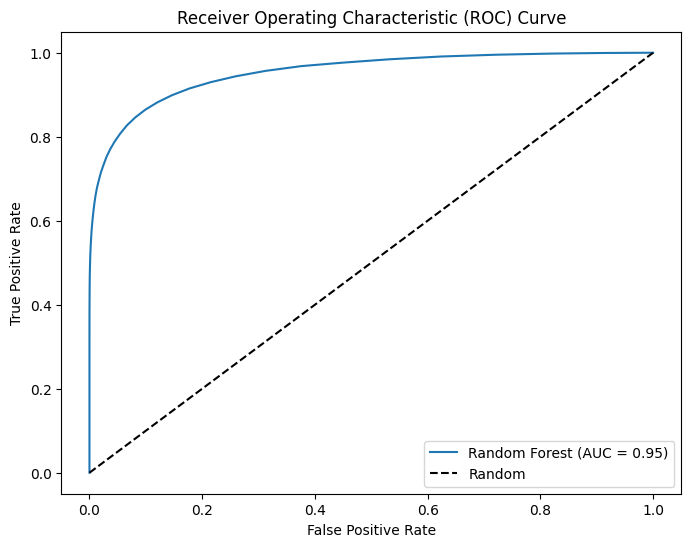

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



X = new_df.drop('TARGET', axis=1)
y = new_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate AUC-ROC
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, rf_probabilities)

# Print AUC-ROC
print("Random Forest AUC-ROC:", auc_roc_rf)

# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_roc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
